# Setup

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import seaborn as sns
import numpy as np
from field_neuro.uwb.plot_path import plot_path
import importlib
import field_neuro.uwb.animate_path as ap
importlib.reload(ap)

# Load the data
output_fp = r"Y:\Data\FieldProject\Output"
df = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\uwb\T005_uwb_1hz.csv')  # Adjust the path to your metadata file
df.head()

C:\Users\ayalab\AppData\Local\Temp\ipykernel_21568\272129982.py:13: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\uwb\T005_uwb_1hz.csv')  # Adjust the path to your metadata file


trial sex  code  noon_day               field_time  smoothed_x  smoothed_y  \
0  T005   F  FAUM         2  2024-06-23 14:57:38.121   21.335622    4.590388   
1  T005   F  FAUM         2  2024-06-23 14:57:55.090   21.207130    4.334578   
2  T005   F  FAUM         2  2024-06-23 14:58:02.507   21.170899    4.207318   
3  T005   F  FAUM         2  2024-06-23 14:58:05.838   21.130031    4.153308   
4  T005   F  FAUM         2  2024-06-23 14:58:06.684   21.014533    4.109042   

   location_x  location_y zones hex_id  
0   21.335622    4.590388   NaN   3014  
1   21.078638    4.078768   NaN   3014  
2   21.200790    4.192039   NaN   3014  
3   20.966560    3.937266   NaN   3014  
4   20.660500    3.979886   NaN   3014

In [20]:
# Convert fields with mixed types to their appropriate types
df['hex_id'] = pd.to_numeric(df['hex_id'], errors='coerce').astype('Int64')
df['noon_day'] = pd.to_numeric(df['noon_day'], errors='coerce').astype('Int64')
df['field_time'] = pd.to_datetime(df['field_time'], errors='coerce')
df['location_x'] = pd.to_numeric(df['location_x'], errors='coerce')
df['location_y'] = pd.to_numeric(df['location_y'], errors='coerce')
# df['time_diff'] = pd.to_numeric(df['time_diff'], errors='coerce')
# df['distance'] = pd.to_numeric(df['distance'], errors='coerce')
# df['is_jump'] = df['is_jump'].astype('boolean')


print(len(df))

# # Check the data types of each column
# print(df.dtypes)

# # Check unique data types within each column (useful to identify mixed types)
# mixed_type_columns = [3,4,5,6,7,8,9,10,11,12,14]
# for col in mixed_type_columns:
#     print(f"Column {col}: {df.columns[col]}")
#     print(df.iloc[:, col].apply(type).value_counts())

# # Display some rows from the problematic columns to see what kind of data they contain
# print(df.iloc[:, mixed_type_columns].head(20))



3791903


In [7]:
df.head()

trial sex  code  hex_id  noon_day              field_time zones  location_x  \
0  T005   F  FAUM    3014         2 2024-06-23 14:57:38.121   NaN   21.335622   
1  T005   F  FAUM    3014         2 2024-06-23 14:57:55.090   NaN   21.078638   
2  T005   F  FAUM    3014         2 2024-06-23 14:57:55.626   NaN   21.068546   
3  T005   F  FAUM    3014         2 2024-06-23 14:58:02.507   NaN   21.200790   
4  T005   F  FAUM    3014         2 2024-06-23 14:58:02.551   NaN   21.094212   

   location_y alias groupnames  time_diff  distance  velocity  is_jump  \
0    4.590388  Auma  ,Females,      0.000       NaN       NaN    False   
1    4.078768  Auma  ,Females,     16.969  0.572534  0.033740    False   
2    3.968079  Auma  ,Females,      0.536  0.111148  0.207366    False   
3    4.192039  Auma  ,Females,      6.881  0.260089  0.037798    False   
4    4.211547  Auma  ,Females,      0.044  0.108349  2.462469    False   

   time_diff_s  tw_group  smoothed_x  smoothed_y  
0          0.0       0.0   21.335622    4.590388  
1         17.0       1.0   21.078638    4.078768  
2          1.0       1.0   21.073592    4.023424  
3          7.0       1.0   21.115991    4.079629  
4          1.0       1.0   21.110546    4.112608

# plot paths of specific animals

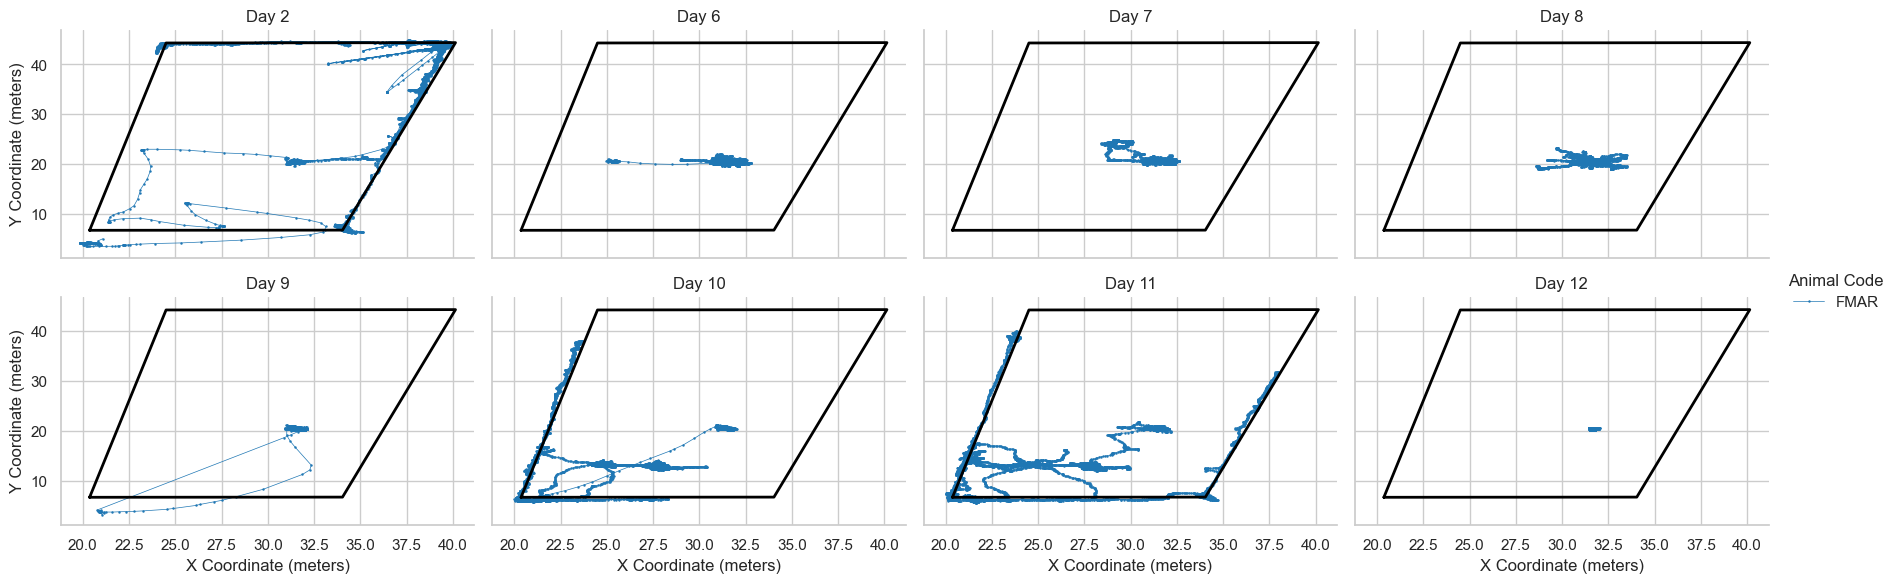

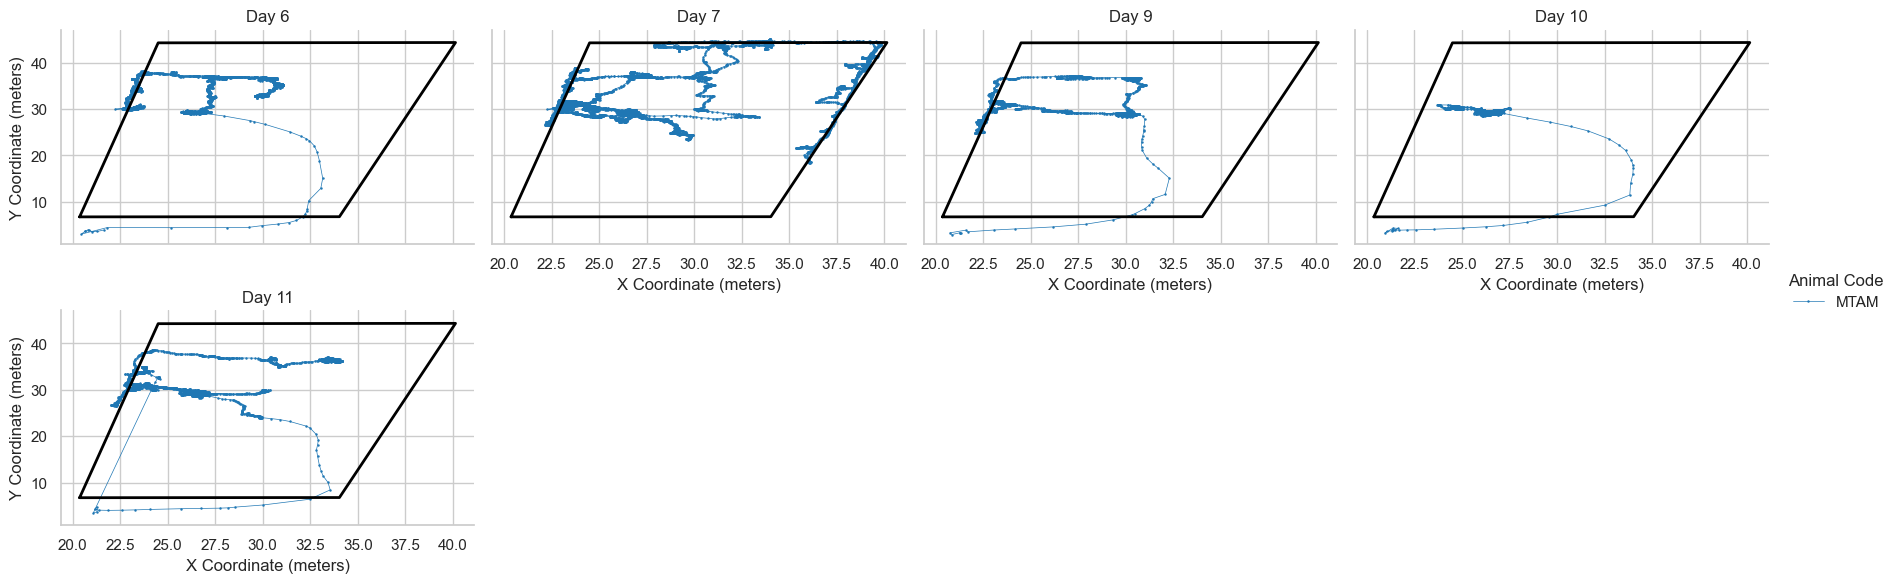

In [21]:
plot_path(df, filter_by="FMAR",filter_day="all")
plot_path(df, filter_by="MTAM",filter_day="all")

# Plot paths of males and females

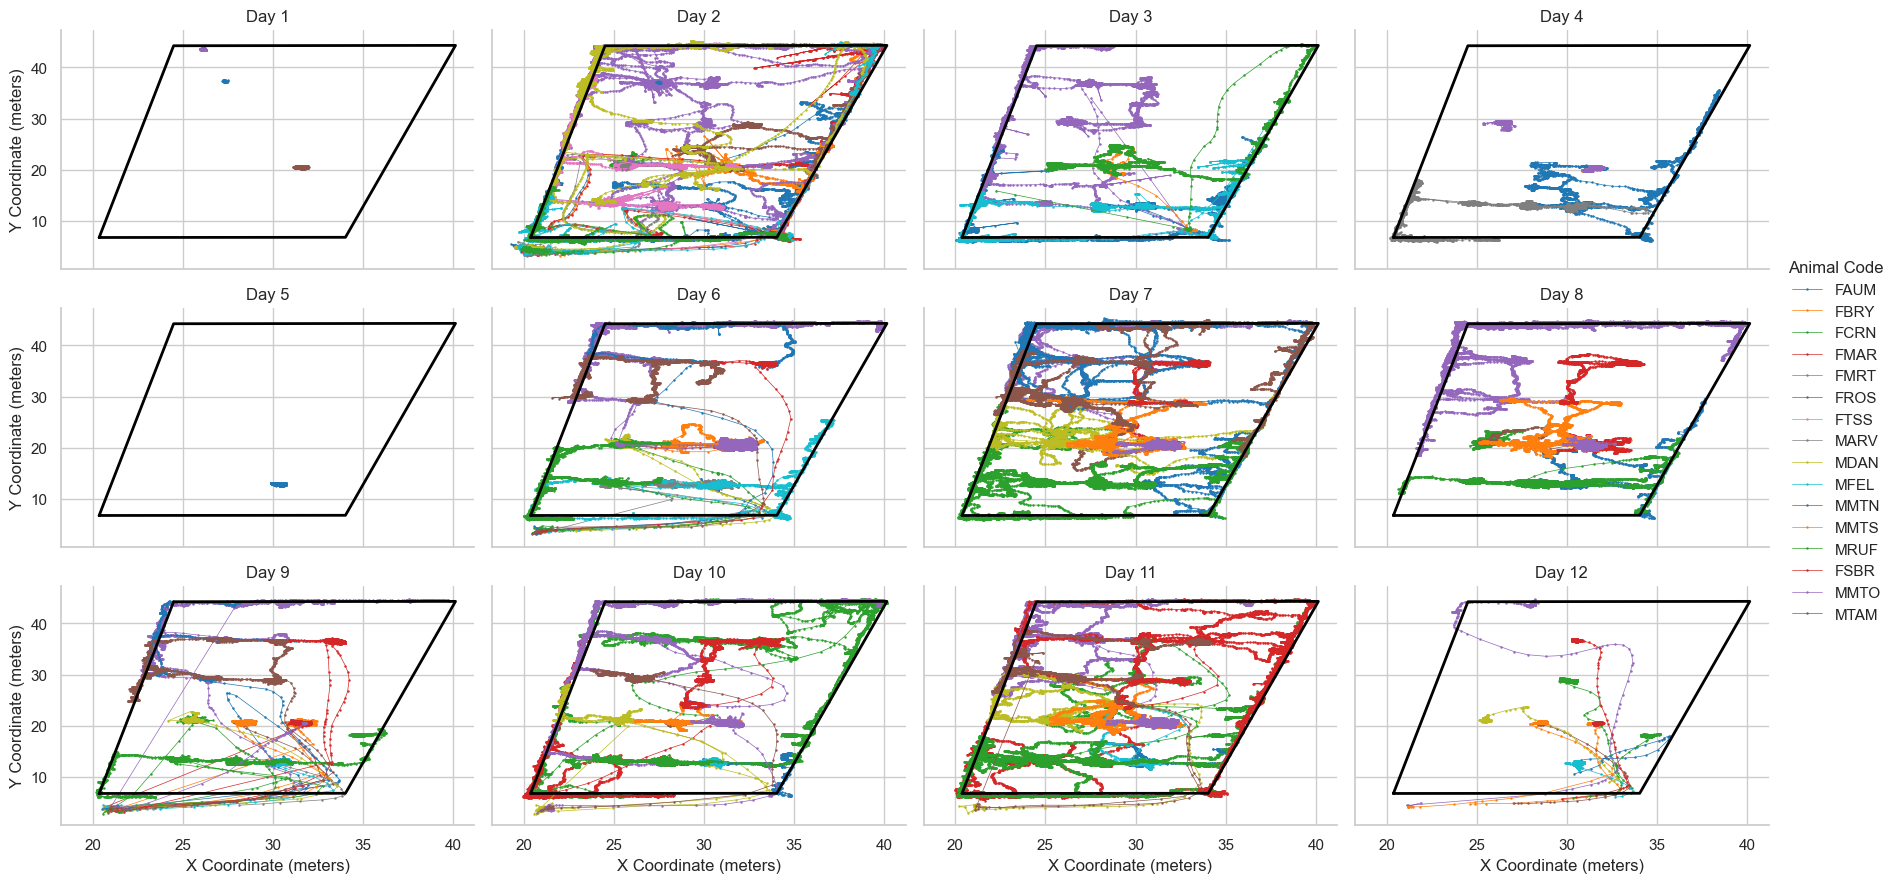

In [14]:
plot_path(df, filter_by="all",filter_day="all")

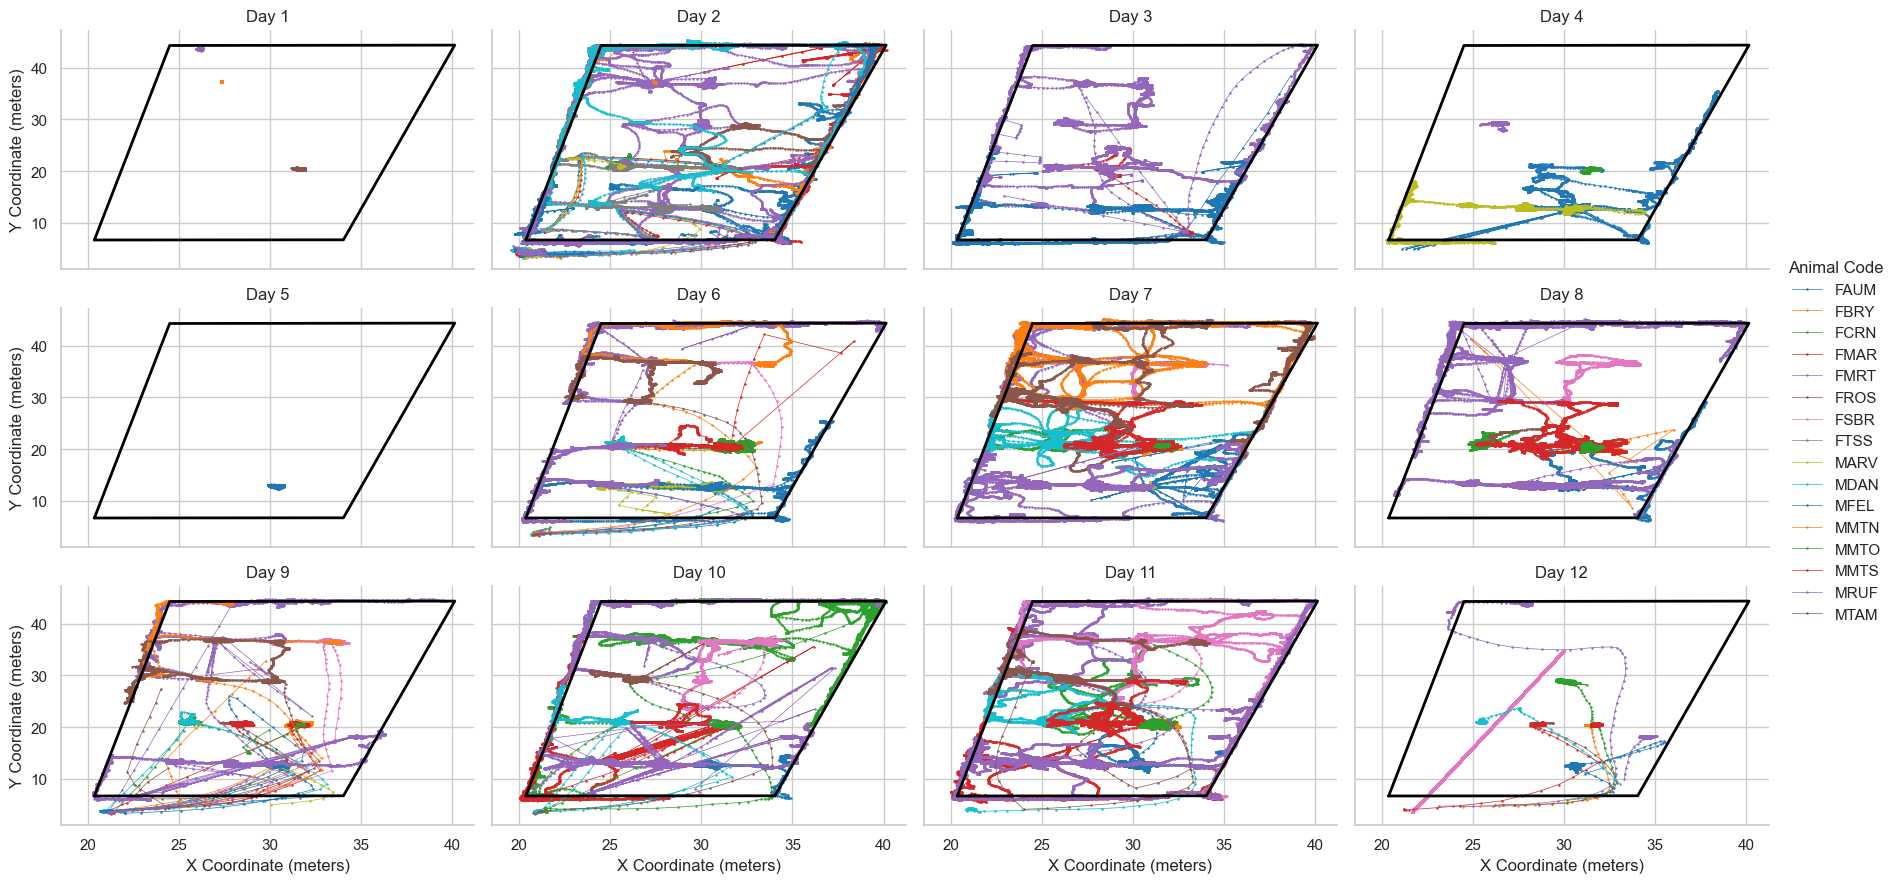

In [22]:
plot_path(df, filter_by="all",filter_day="all")

# Plot paths of males only

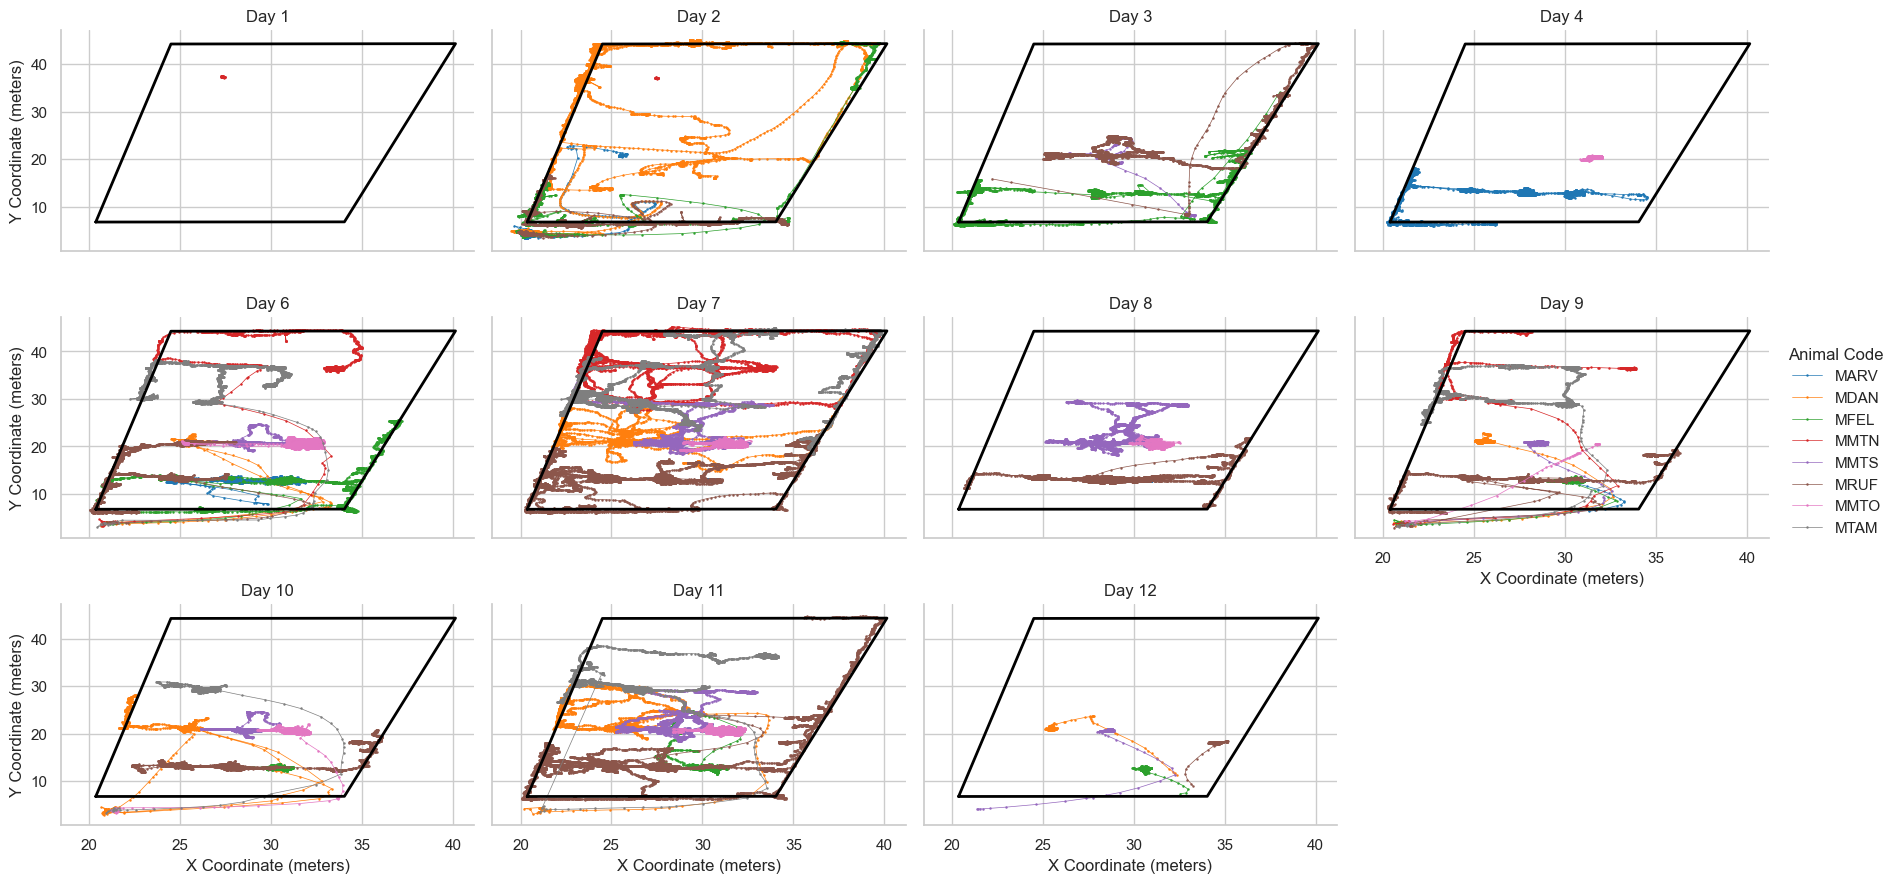

In [22]:
plot_path(df, filter_by="males",filter_day="all")

# Plot paths of females only


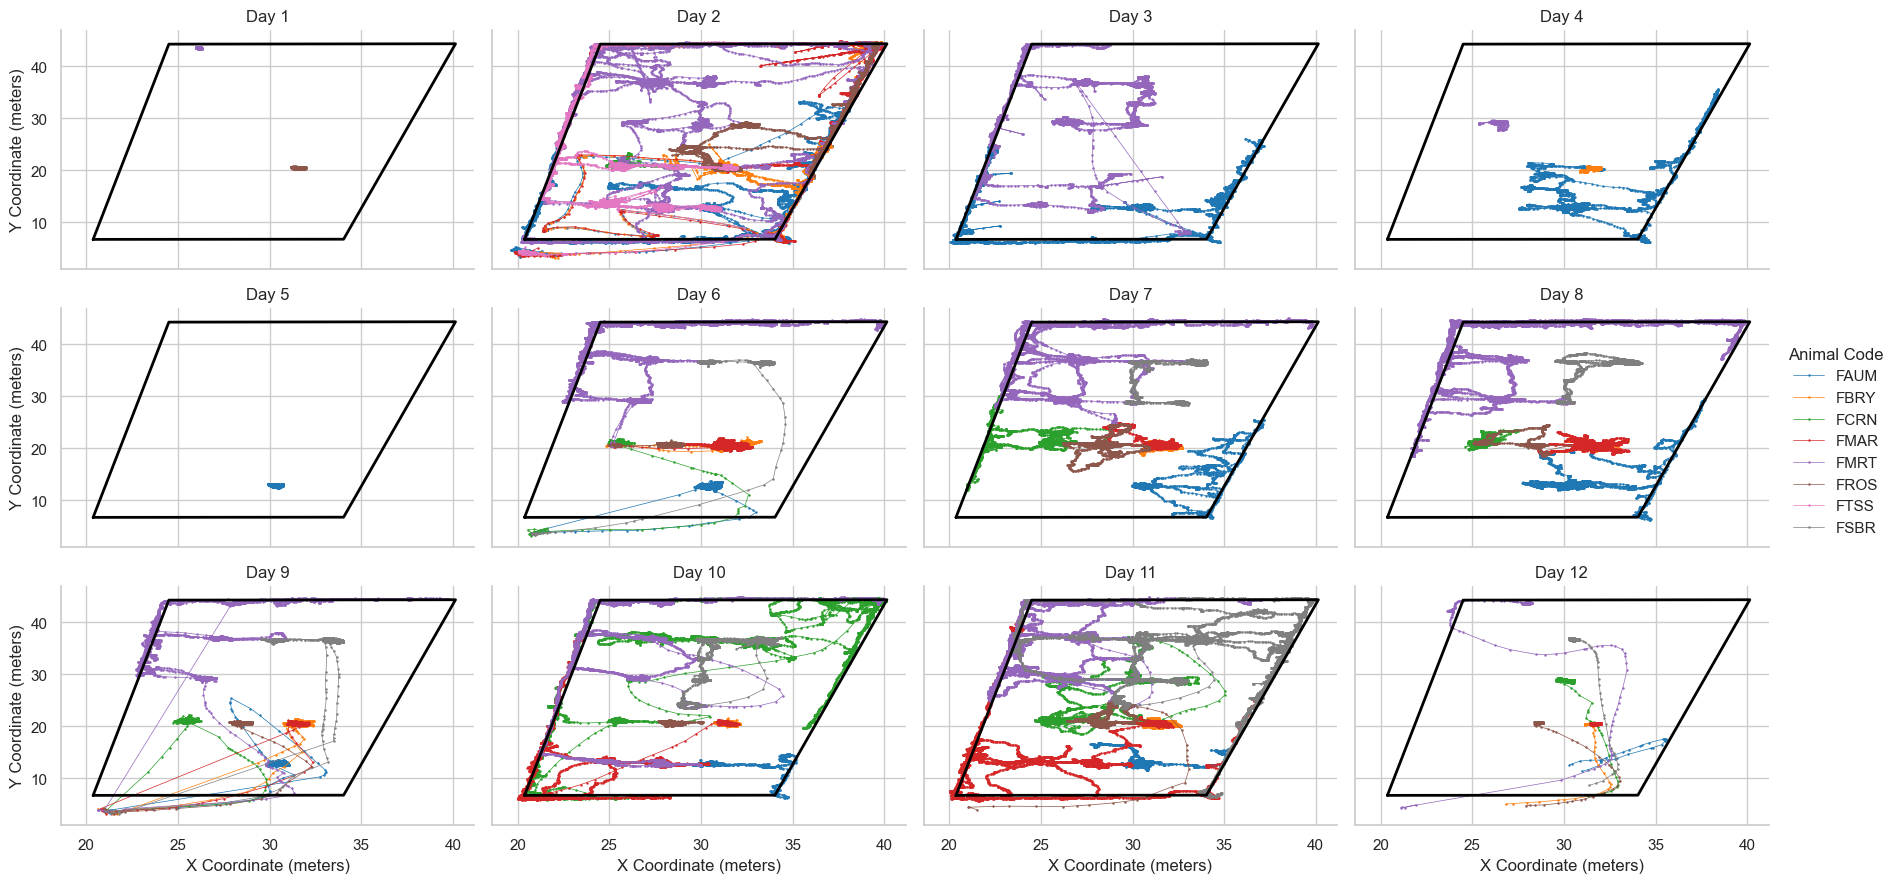

In [23]:
plot_path(df, filter_by="females",filter_day="all")

# Create multi animal animation

In [ ]:
ap.animate_path(df, filter_by="all", filter_day="11,12", time_window=10, trailing_window=1800, fps=20,
             arena_layout_fp=r"Y:\Data\2024_Vogt_LID_SWRDisruption\data\T001\uwb\arena_layout.csv",
             weather_fp=r"Y:\Data\2024_Vogt_LID_SWRDisruption\data\T001\weather.csv",
             output_fp=output_fp) ## defined variable previously

# Homing pilot paths

## Plot a set time period after the start of the trial. 

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon

# Load the updated metadata
homing_metadata = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\HomingPilotMetadata.csv')

# Convert the trial_date and trial_time to a single datetime column
homing_metadata['trial_start'] = pd.to_datetime(homing_metadata['trial_date'] + ' ' + homing_metadata['trial_time'], format='%m/%d/%Y %H:%M:%S')

# Load the arena layout details
arena_layout = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\uwb_arena_layout.csv')

# Convert from inches to meters
arena_layout[['x', 'y']] = arena_layout[['x', 'y']] * 0.0254  

# Separate arena and zones for drawing
arena_coords = arena_layout[arena_layout['type'] == 'arena']
zones = arena_layout[arena_layout['type'] != 'arena']
zone_names = zones['type'].unique()

# Loop through each row in the meta DataFrame to generate plots for each animal
for index, row in homing_metadata.iterrows():
    # Extract information for the current animal
    animal_code = row['focal_code']
    trial_start = row['trial_start']
    
    # Filter the dataframe for the specific animal within 12 hours after the trial start
    filtered_df = df[(df['code'] == animal_code) & 
                     (df['field_time'] >= trial_start) & 
                     (df['field_time'] <= trial_start + pd.Timedelta(hours=12))]
    
    # Plotting
    plt.figure(figsize=(6, 4))
    
    # Plot each animal's trajectory with color based on sex
    for code in filtered_df['code'].unique():
        animal_data = filtered_df[filtered_df['code'] == code]
        color = 'blue' if animal_data['sex'].values[0] == 'M' else 'red'
        
        # Draw the line connecting the points
        plt.plot(animal_data['smoothed_x'], animal_data['smoothed_y'], color=color, alpha=0.5, linewidth=1)
        
        # Plot the current position (last point in the data)
        plt.plot(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1], 'o', color=color)
        
        # Add the code label above the dot
        plt.text(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1] + 0.5, code, 
                 fontsize=8, ha='center', color=color)
    
    plt.title(f"Trajectory for Animal Code {animal_code} (12 hours after trial start)")
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    
    # Draw arena boundary
    plt.plot(arena_coords['x'], arena_coords['y'], color='black', linewidth=2, label='Arena Boundary')

    # Draw zones
    for zone_name in zone_names:
        zone_coords = zones[zones['type'] == zone_name]
        polygon = Polygon(zone_coords[['x', 'y']].values, closed=True, edgecolor='black', facecolor='lightgray', alpha=0.5)
        plt.gca().add_patch(polygon)

    plt.legend(title="Trajectory")
    
    # Show the plot
    plt.show()

ValueError: unconverted data remains when parsing with format "%m/%d/%Y %H%M": ":54:30", at position 0. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

## Plot trajectory until animal returns to starting location

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon

# Load the updated metadata
homing_metadata = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\HomingPilotMetadata.csv')

# Convert the trial_date and trial_time to a single datetime column
homing_metadata['trial_start'] = pd.to_datetime(homing_metadata['trial_date'] + ' ' + homing_metadata['trial_time'], format='%m/%d/%Y %H:%M:%S')

# Load the arena layout details
arena_layout = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\uwb_arena_layout.csv')

# Convert from inches to meters
arena_layout[['x', 'y']] = arena_layout[['x', 'y']] * 0.0254  

# Separate arena and zones for drawing
arena_coords = arena_layout[arena_layout['type'] == 'arena']
zones = arena_layout[arena_layout['type'] != 'arena']
zone_names = zones['type'].unique()

# Loop through each row in the metadata to generate plots for each animal
for index, row in homing_metadata.iterrows():
    # Extract information for the current animal
    animal_code = row['focal_code']
    trial_start = row['trial_start']
    trap_location = row['trap_location']
    
    # Get the coordinates of the trap location from the layout
    trap_coords = zones[zones['type'] == trap_location][['x', 'y']].values
    # Calculate the center of the trap location
    trap_center = trap_coords.mean(axis=0)
    
    # Filter the dataframe for the specific animal
    filtered_df = df[(df['code'] == animal_code) & 
                     (df['field_time'] >= trial_start)]

    # Initialize variables to store when the animal reaches the trap location and the circular area
    trap_reached_time = None
    circular_area_reached_time = None
    truncate_index = None  # To track where to truncate if needed
    
    # Store the first known position of the animal
    first_x = filtered_df['smoothed_x'].values[0]
    first_y = filtered_df['smoothed_y'].values[0]

    # Find the point where the animal crosses into the trap location or within the 1m circular area
    for i in range(1, len(filtered_df)):
        point_x = filtered_df['smoothed_x'].values[i]
        point_y = filtered_df['smoothed_y'].values[i]
        
        # Check if the current point is within the trap boundary
        if (trap_coords[0][0] <= point_x <= trap_coords[1][0]) and (trap_coords[0][1] <= point_y <= trap_coords[1][1]):
            if trap_reached_time is None:
                trap_reached_time = filtered_df['field_time'].values[i]
                truncate_index = i
            break
        
        # Check if the current point is within 1 meter of the center of the trap location
        distance_to_center = ((point_x - trap_center[0])**2 + (point_y - trap_center[1])**2) ** 0.5
        if distance_to_center <= 1.0:
            if circular_area_reached_time is None:
                circular_area_reached_time = filtered_df['field_time'].values[i]
                truncate_index = i
            break

    # If the animal enters the trap zone or circle, truncate the dataframe
    if truncate_index:
        filtered_df = filtered_df[:truncate_index + 1]

    # Plotting
    plt.figure(figsize=(6, 4))
    
    # Disable the grid lines
    plt.grid(False)
    
    # Plot each animal's trajectory with color based on sex
    for code in filtered_df['code'].unique():
        animal_data = filtered_df[filtered_df['code'] == code]
        color = 'blue' if animal_data['sex'].values[0] == 'M' else 'red'
        
        # Draw the line connecting the points
        plt.plot(animal_data['smoothed_x'], animal_data['smoothed_y'], color=color, alpha=0.5, linewidth=1)
        
        # Plot the current position (last point in the data)
        plt.plot(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1], 'o', color=color)
        
        # Add the code label above the dot
        plt.text(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1] + 0.5, code, 
                 fontsize=8, ha='center', color=color)
    
    plt.title(f"Trajectory for Animal Code {animal_code}")
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    
    # Draw arena boundary
    plt.plot(arena_coords['x'], arena_coords['y'], color='black', linewidth=2, label='Arena Boundary')

    # Draw zones
    for zone_name in zone_names:
        zone_coords = zones[zones['type'] == zone_name]
        polygon = Polygon(zone_coords[['x', 'y']].values, closed=True, edgecolor='black', facecolor='lightgray', alpha=0.5)
        plt.gca().add_patch(polygon)

    # Draw a red dotted circle around the center of the trap location
    trap_circle = Circle(trap_center, 1.0, color='red', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_patch(trap_circle)

    # Draw a green dotted circle around the animal's first known position
    start_circle = Circle((first_x, first_y), 0.5, color='green', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_patch(start_circle)

    # Add the time taken to reach the trap location and the circular area
    if trap_reached_time:
        time_to_trap = (trap_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.1, f"Time to reach trap location: {time_to_trap:.2f} minutes", ha="center", fontsize=12)
    elif circular_area_reached_time:
        time_to_circle = (circular_area_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.1, f"Time to reach trap location: {time_to_circle:.2f} minutes", ha="center", fontsize=12)
    else:
        plt.figtext(0.5, -0.1, "Animal does not return to trap location or visit the 1m circle", ha="center", fontsize=12)

    plt.legend(title="Trajectory")
    
    # Show the plot
    plt.show()


TypeError: '>=' not supported between instances of 'str' and 'Timestamp'

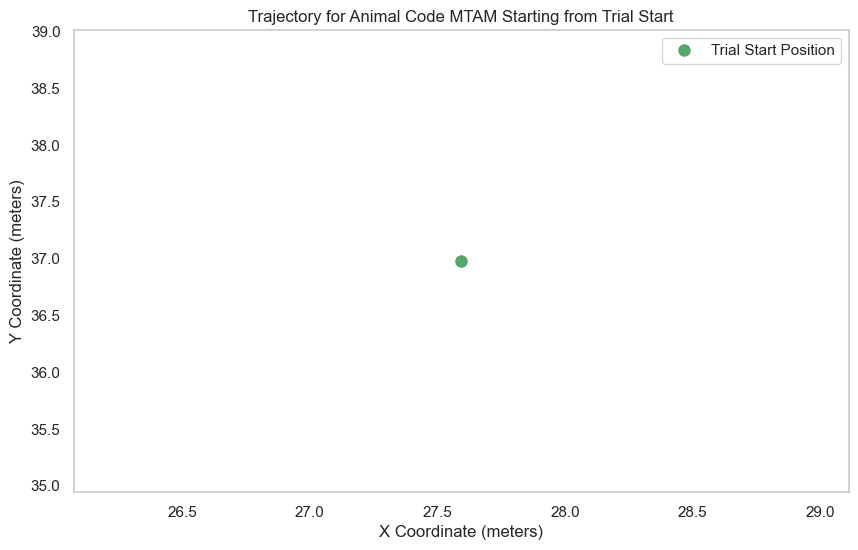

        trial sex  code hex_id  noon_day              field_time zones  \
3794802  T005   M  MTAM   303f        11 2024-07-02 23:34:00.042   NaN   
3794803  T005   M  MTAM   303f        11 2024-07-02 23:34:01.013   NaN   
3794804  T005   M  MTAM   303f        11 2024-07-02 23:34:02.027   NaN   
3794805  T005   M  MTAM   303f        11 2024-07-02 23:34:03.053   NaN   
3794806  T005   M  MTAM   303f        11 2024-07-02 23:34:04.027   NaN   
3794807  T005   M  MTAM   303f        11 2024-07-02 23:34:05.018   NaN   
3794808  T005   M  MTAM   303f        11 2024-07-02 23:34:06.024   NaN   
3794809  T005   M  MTAM   303f        11 2024-07-02 23:34:07.039   NaN   
3794810  T005   M  MTAM   303f        11 2024-07-02 23:34:08.001   NaN   
3794811  T005   M  MTAM   303f        11 2024-07-02 23:34:09.062   NaN   
3794812  T005   M  MTAM   303f        11 2024-07-02 23:34:10.008   NaN   
3794813  T005   M  MTAM   303f        11 2024-07-02 23:34:11.014   NaN   
3794814  T005   M  MTAM   303f        

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated metadata and filter for MTAM
homing_metadata = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\HomingPilotMetadata.csv')
homing_metadata['trial_start'] = pd.to_datetime(homing_metadata['trial_date'] + ' ' + homing_metadata['trial_time'], format='%m/%d/%Y %H:%M:%S')

# Extract the trial start time for MTAM
mtam_metadata = homing_metadata[homing_metadata['focal_code'] == 'MTAM']
mtam_trial_start = mtam_metadata['trial_start'].values[0]

# Filter the main dataframe for MTAM's data starting from the trial start time
mtam_df = df[(df['code'] == 'MTAM') & (df['field_time'] >= mtam_trial_start)]

# Plot the trajectory for MTAM starting from the trial start time
plt.figure(figsize=(10, 6))

# Plot the animal's trajectory with color based on sex
color = 'blue' if mtam_df['sex'].values[0] == 'M' else 'red'

# Draw the line connecting the points
plt.plot(mtam_df['smoothed_x'], mtam_df['smoothed_y'], color=color, alpha=0.5, linewidth=1, marker='o')

# Highlight the trial start position
start_point_x = mtam_df['smoothed_x'].iloc[0]
start_point_y = mtam_df['smoothed_y'].iloc[0]
plt.plot(start_point_x, start_point_y, 'go', markersize=8, label='Trial Start Position')

# Annotate the plot
plt.title('Trajectory for Animal Code MTAM Starting from Trial Start')
plt.xlabel('X Coordinate (meters)')
plt.ylabel('Y Coordinate (meters)')
plt.legend()
plt.grid(False)

# Show the plot
plt.show()

# Display the first few rows of MTAM's data from the trial start onwards
print(mtam_df.head(20))


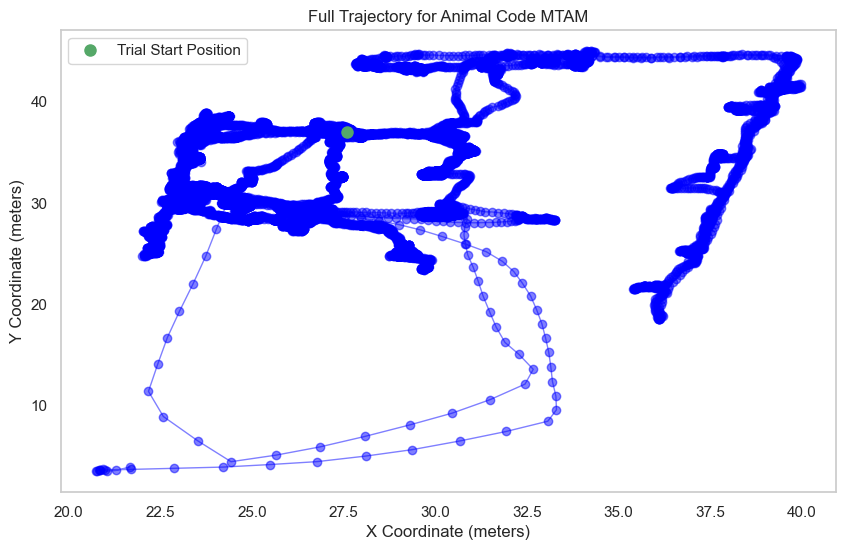

        trial sex  code hex_id  noon_day              field_time zones  \
3794802  T005   M  MTAM   303f        11 2024-07-02 23:34:00.042   NaN   
3794803  T005   M  MTAM   303f        11 2024-07-02 23:34:01.013   NaN   
3794804  T005   M  MTAM   303f        11 2024-07-02 23:34:02.027   NaN   
3794805  T005   M  MTAM   303f        11 2024-07-02 23:34:03.053   NaN   
3794806  T005   M  MTAM   303f        11 2024-07-02 23:34:04.027   NaN   
3794807  T005   M  MTAM   303f        11 2024-07-02 23:34:05.018   NaN   
3794808  T005   M  MTAM   303f        11 2024-07-02 23:34:06.024   NaN   
3794809  T005   M  MTAM   303f        11 2024-07-02 23:34:07.039   NaN   
3794810  T005   M  MTAM   303f        11 2024-07-02 23:34:08.001   NaN   
3794811  T005   M  MTAM   303f        11 2024-07-02 23:34:09.062   NaN   
3794812  T005   M  MTAM   303f        11 2024-07-02 23:34:10.008   NaN   
3794813  T005   M  MTAM   303f        11 2024-07-02 23:34:11.014   NaN   
3794814  T005   M  MTAM   303f        

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the updated metadata and filter for MTAM
homing_metadata = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\HomingPilotMetadata.csv')
homing_metadata['trial_start'] = pd.to_datetime(homing_metadata['trial_date'] + ' ' + homing_metadata['trial_time'], format='%m/%d/%Y %H:%M:%S')

# Extract the trial start time for MTAM
mtam_metadata = homing_metadata[homing_metadata['focal_code'] == 'MTAM']
mtam_trial_start = mtam_metadata['trial_start'].values[0]

# Filter the main dataframe for MTAM's data
mtam_df = df[df['code'] == 'MTAM']

# Plot the entire trajectory for MTAM
plt.figure(figsize=(10, 6))

# Plot each animal's trajectory with color based on sex
color = 'blue' if mtam_df['sex'].values[0] == 'M' else 'red'

# Draw the line connecting the points
plt.plot(mtam_df['smoothed_x'], mtam_df['smoothed_y'], color=color, alpha=0.5, linewidth=1, marker='o')

# Highlight the trial start position
start_point_x = mtam_df[mtam_df['field_time'] >= mtam_trial_start]['smoothed_x'].iloc[0]
start_point_y = mtam_df[mtam_df['field_time'] >= mtam_trial_start]['smoothed_y'].iloc[0]
plt.plot(start_point_x, start_point_y, 'go', markersize=8, label='Trial Start Position')

# Annotate the plot
plt.title('Full Trajectory for Animal Code MTAM')
plt.xlabel('X Coordinate (meters)')
plt.ylabel('Y Coordinate (meters)')
plt.legend()
plt.grid(False)

# Show the plot
plt.show()

# Display the first few rows of MTAM's data around the trial start
mtam_df_filtered = mtam_df[mtam_df['field_time'] >= mtam_trial_start]
print(mtam_df_filtered.head(20))


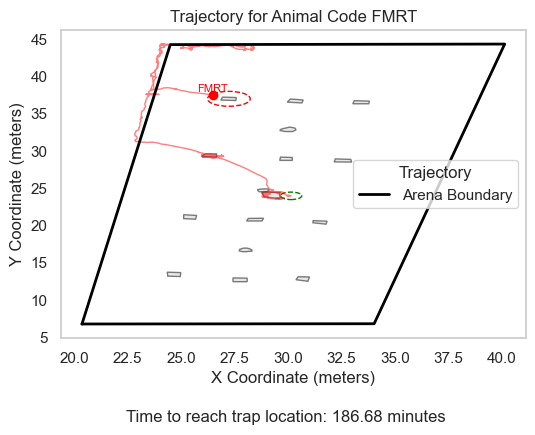

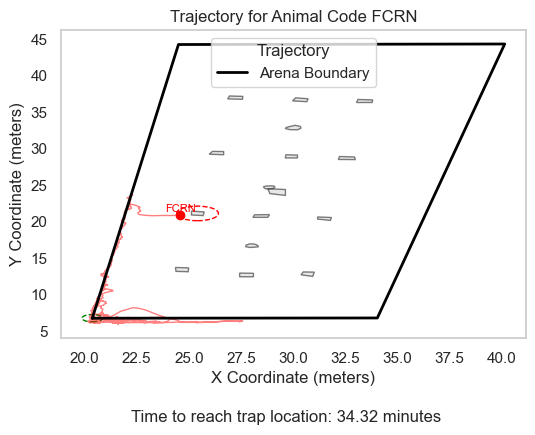

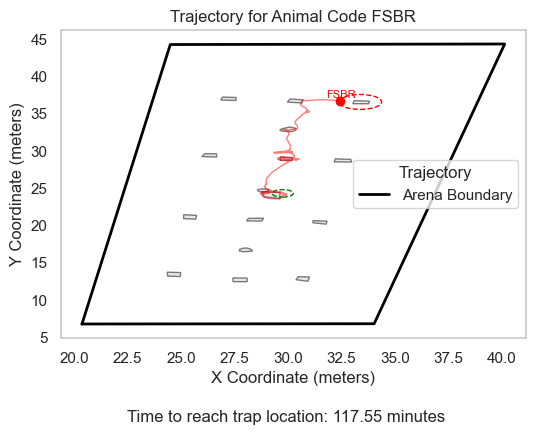

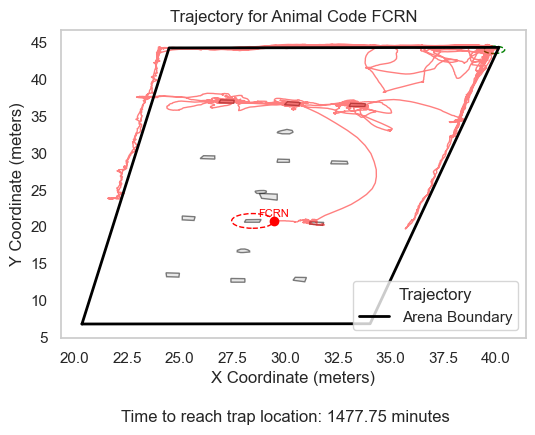

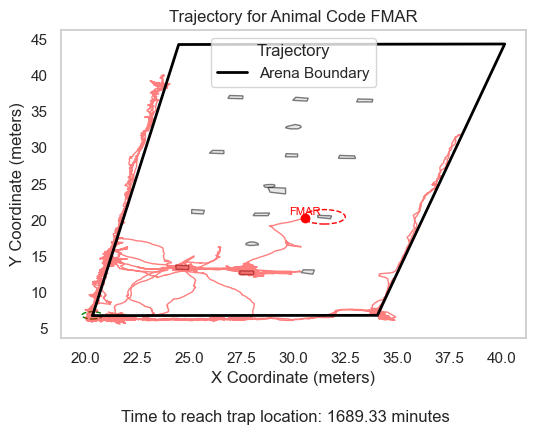

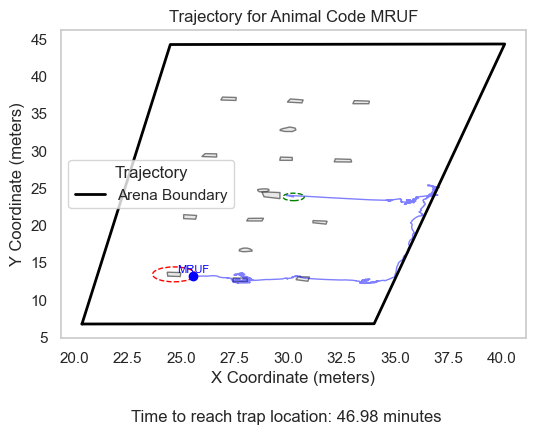

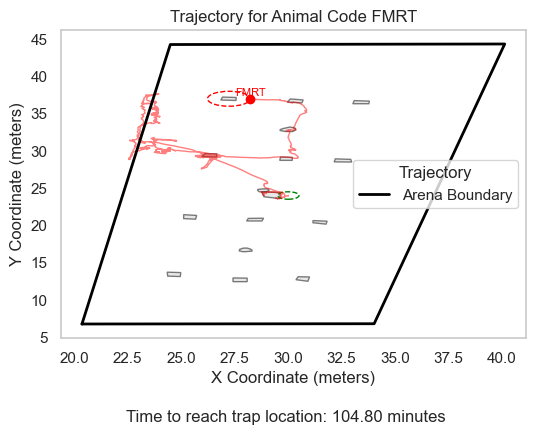

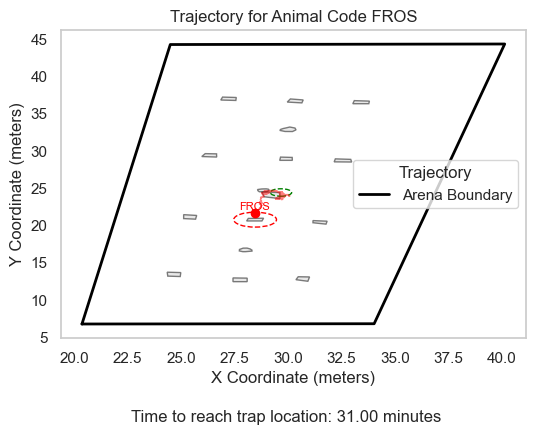

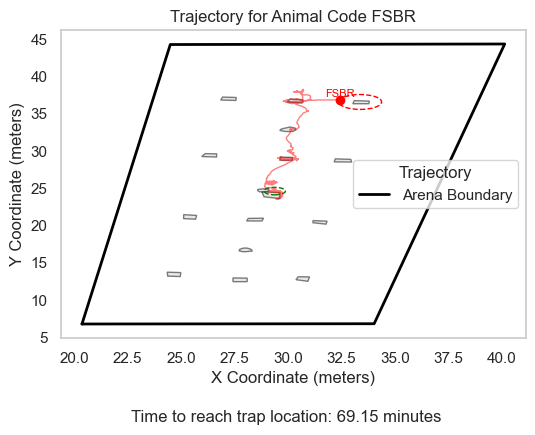

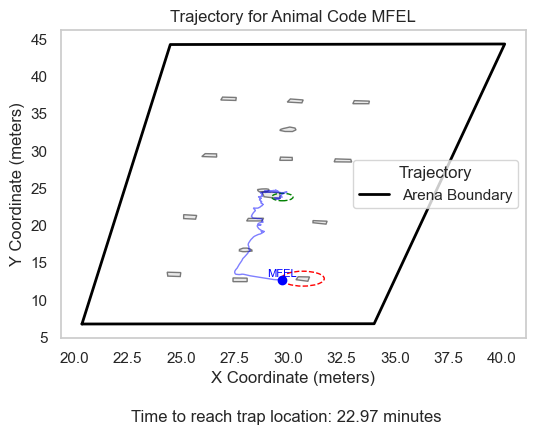

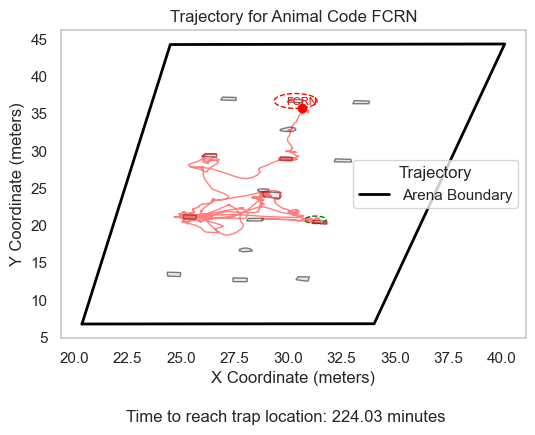

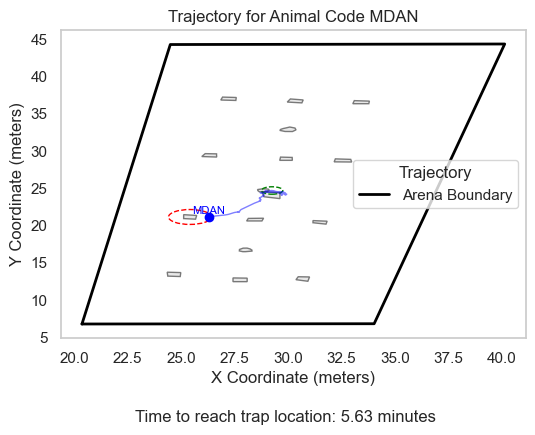

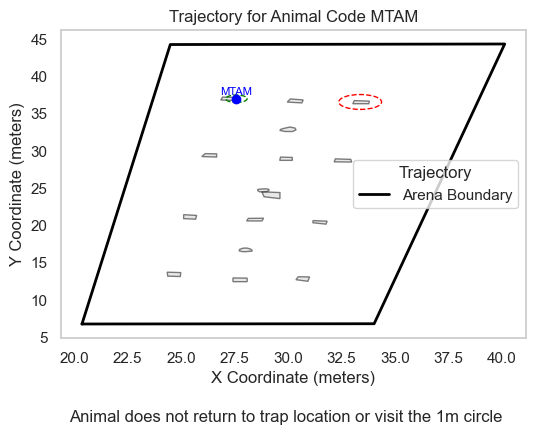

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon

# Load the updated metadata
homing_metadata = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\HomingPilotMetadata.csv')

# Convert the trial_date and trial_time to a single datetime column
homing_metadata['trial_start'] = pd.to_datetime(homing_metadata['trial_date'] + ' ' + homing_metadata['trial_time'], format='%m/%d/%Y %H:%M:%S')

# Load the arena layout details
arena_layout = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\uwb_arena_layout.csv')

# Convert from inches to meters
arena_layout[['x', 'y']] = arena_layout[['x', 'y']] * 0.0254  

# Separate arena and zones for drawing
arena_coords = arena_layout[arena_layout['type'] == 'arena']
zones = arena_layout[arena_layout['type'] != 'arena']
zone_names = zones['type'].unique()

# Loop through each row in the metadata to generate plots for each animal
for index, row in homing_metadata.iterrows():
    # Extract information for the current animal
    animal_code = row['focal_code']
    trial_start = row['trial_start']
    trap_location = row['trap_location']
    
    # Get the coordinates of the trap location from the layout
    trap_coords = zones[zones['type'] == trap_location][['x', 'y']].values
    # Calculate the center of the trap location
    trap_center = trap_coords.mean(axis=0)
    
    # Filter the dataframe for the specific animal
    filtered_df = df[(df['code'] == animal_code) & 
                     (df['field_time'] >= trial_start)]

    # Initialize variables to store when the animal reaches the trap location and the circular area
    trap_reached_time = None
    circular_area_reached_time = None
    
    # Store the first known position of the animal
    first_x = filtered_df['smoothed_x'].values[0]
    first_y = filtered_df['smoothed_y'].values[0]

    # Find the point where the animal crosses into the trap location or within the 1m circular area
    for i in range(1, len(filtered_df)):
        point_x = filtered_df['smoothed_x'].values[i]
        point_y = filtered_df['smoothed_y'].values[i]
        
        # Check if the current point is within the trap boundary
        if (trap_coords[0][0] <= point_x <= trap_coords[1][0]) and (trap_coords[0][1] <= point_y <= trap_coords[1][1]):
            if trap_reached_time is None:
                trap_reached_time = filtered_df['field_time'].values[i]
            filtered_df = filtered_df[:i+1]  # Truncate the dataframe up to this point
            break
        
        # Check if the current point is within 1 meter of the center of the trap location
        distance_to_center = ((point_x - trap_center[0])**2 + (point_y - trap_center[1])**2) ** 0.5
        if distance_to_center <= 1.0:
            if circular_area_reached_time is None:
                circular_area_reached_time = filtered_df['field_time'].values[i]
            filtered_df = filtered_df[:i+1]  # Truncate the dataframe up to this point
            break

    # Plotting
    plt.figure(figsize=(6, 4))
    
    # Disable the grid lines
    plt.grid(False)
    
    # Plot each animal's trajectory with color based on sex
    for code in filtered_df['code'].unique():
        animal_data = filtered_df[filtered_df['code'] == code]
        color = 'blue' if animal_data['sex'].values[0] == 'M' else 'red'
        
        # Draw the line connecting the points
        plt.plot(animal_data['smoothed_x'], animal_data['smoothed_y'], color=color, alpha=0.5, linewidth=1)
        
        # Plot the current position (last point in the data)
        plt.plot(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1], 'o', color=color)
        
        # Add the code label above the dot
        plt.text(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1] + 0.5, code, 
                 fontsize=8, ha='center', color=color)
    
    plt.title(f"Trajectory for Animal Code {animal_code}")
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    
    # Draw arena boundary
    plt.plot(arena_coords['x'], arena_coords['y'], color='black', linewidth=2, label='Arena Boundary')

    # Draw zones
    for zone_name in zone_names:
        zone_coords = zones[zones['type'] == zone_name]
        polygon = Polygon(zone_coords[['x', 'y']].values, closed=True, edgecolor='black', facecolor='lightgray', alpha=0.5)
        plt.gca().add_patch(polygon)

    # Draw a red dotted circle around the center of the trap location
    trap_circle = Circle(trap_center, 1.0, color='red', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_patch(trap_circle)

    # Draw a green dotted circle around the animal's first known position
    start_circle = Circle((first_x, first_y), 0.5, color='green', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_patch(start_circle)

    # Add the time taken to reach the trap location and the circular area
    if trap_reached_time:
        time_to_trap = (trap_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.1, f"Time to reach trap location: {time_to_trap:.2f} minutes", ha="center", fontsize=12)
    elif circular_area_reached_time:
        time_to_circle = (circular_area_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.1, f"Time to reach trap location: {time_to_circle:.2f} minutes", ha="center", fontsize=12)
    else:
        plt.figtext(0.5, -0.1, "Animal does not return to trap location or visit the 1m circle", ha="center", fontsize=12)

    plt.legend(title="Trajectory")
    
    # Show the plot
    plt.show()


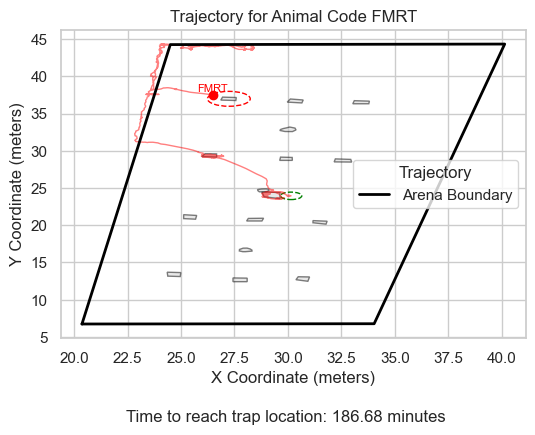

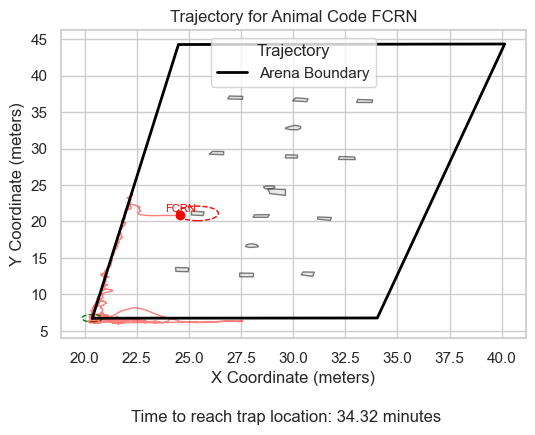

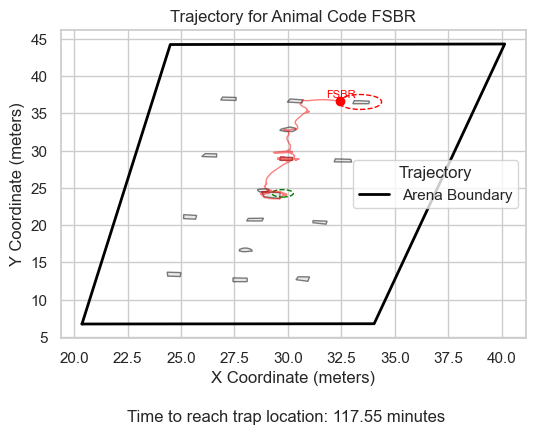

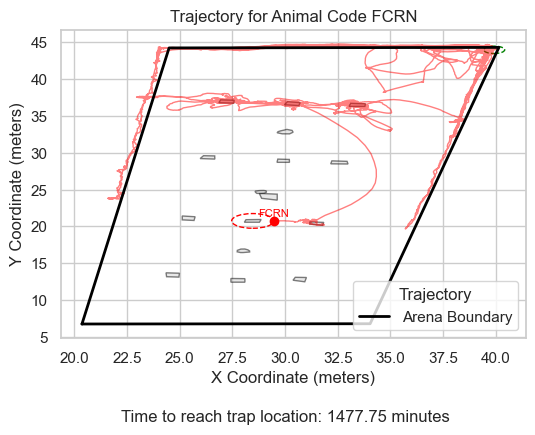

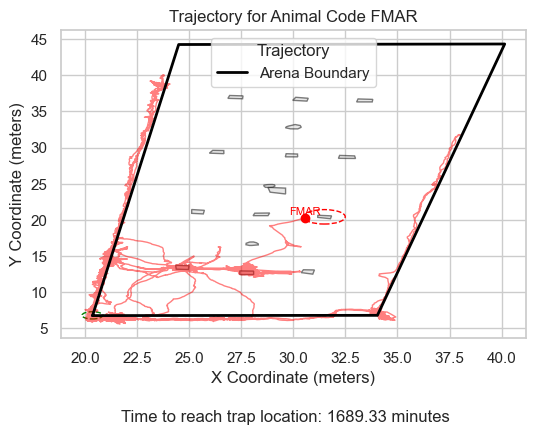

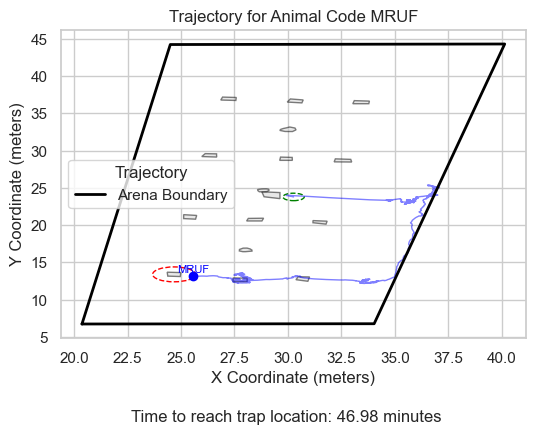

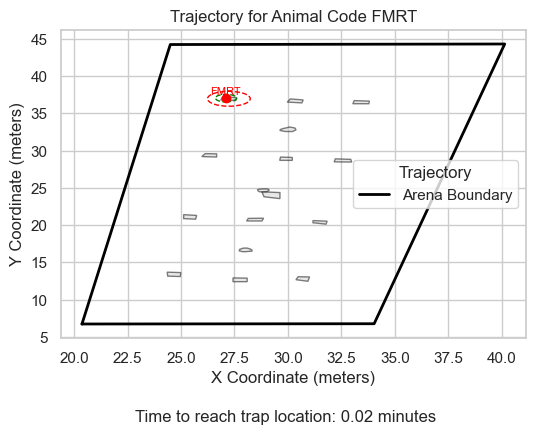

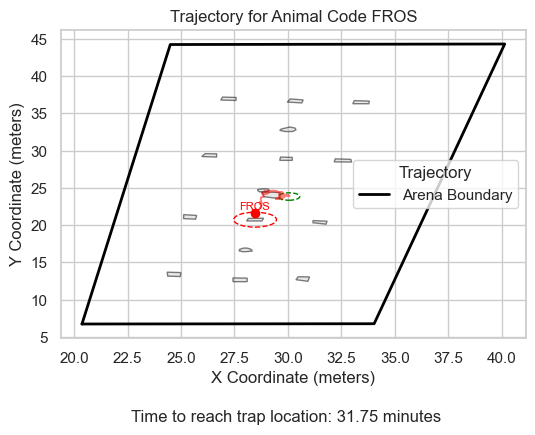

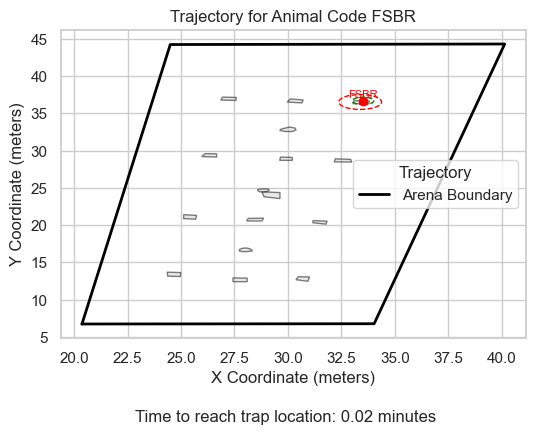

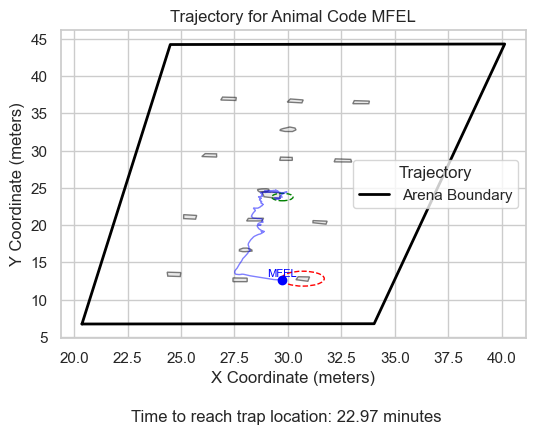

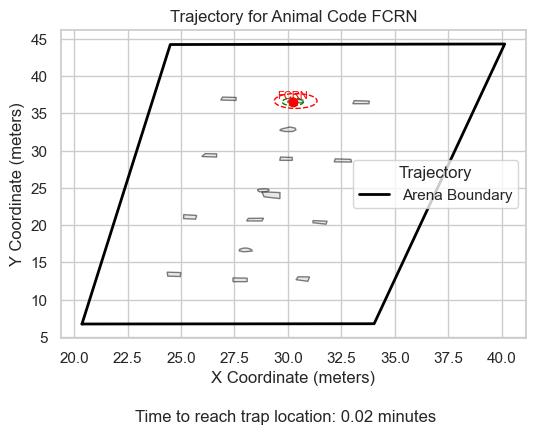

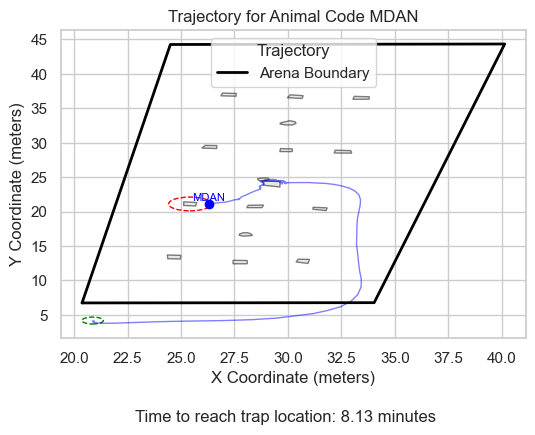

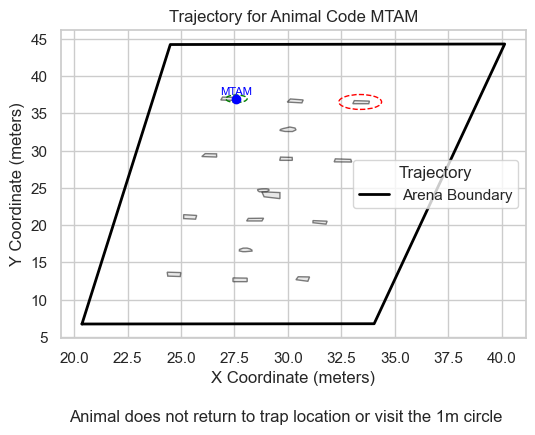

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, Polygon

# Load the updated metadata
homing_metadata = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\HomingPilotMetadata.csv')

# Convert the trial_date and trial_time to a single datetime column
homing_metadata['trial_start'] = pd.to_datetime(homing_metadata['trial_date'] + ' ' + homing_metadata['trial_time'], format='%m/%d/%Y %H:%M:%S')

# Load the arena layout details
arena_layout = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\uwb_arena_layout.csv')

# Convert from inches to meters
arena_layout[['x', 'y']] = arena_layout[['x', 'y']] * 0.0254  

# Separate arena and zones for drawing
arena_coords = arena_layout[arena_layout['type'] == 'arena']
zones = arena_layout[arena_layout['type'] != 'arena']
zone_names = zones['type'].unique()

from matplotlib.patches import Circle

# Loop through each row in the metadata to generate plots for each animal
for index, row in homing_metadata.iterrows():
    # Extract information for the current animal
    animal_code = row['focal_code']
    trial_start = row['trial_start']
    trap_location = row['trap_location']
    
    # Get the coordinates of the trap location from the layout
    trap_coords = zones[zones['type'] == trap_location][['x', 'y']].values
    # Calculate the center of the trap location
    trap_center = trap_coords.mean(axis=0)
    
    # Filter the dataframe for the specific animal
    filtered_df = df[(df['code'] == animal_code) & 
                     (df['field_time'] >= trial_start)]

    # Initialize variables to store when the animal reaches the trap location and the circular area
    trap_reached_time = None
    circular_area_reached_time = None
    
    # Store the first known position of the animal
    first_x = filtered_df['smoothed_x'].values[0]
    first_y = filtered_df['smoothed_y'].values[0]

    # Find the point where the animal crosses into the trap location or within the 1m circular area
    for i in range(1, len(filtered_df)):
        point_x = filtered_df['smoothed_x'].values[i]
        point_y = filtered_df['smoothed_y'].values[i]
        
        # Check if the current point is within the trap boundary
        if (trap_coords[0][0] <= point_x <= trap_coords[1][0]) and (trap_coords[0][1] <= point_y <= trap_coords[1][1]):
            if trap_reached_time is None:
                trap_reached_time = filtered_df['field_time'].values[i]
            filtered_df = filtered_df[:i+1]  # Truncate the dataframe up to this point
            break
        
        # Check if the current point is within 1 meter of the center of the trap location
        distance_to_center = ((point_x - trap_center[0])**2 + (point_y - trap_center[1])**2) ** 0.5
        if distance_to_center <= 1.0:
            if circular_area_reached_time is None:
                circular_area_reached_time = filtered_df['field_time'].values[i]
            filtered_df = filtered_df[:i+1]  # Truncate the dataframe up to this point
            break

    # Plotting
    plt.figure(figsize=(6, 4))
    
    # Plot each animal's trajectory with color based on sex
    for code in filtered_df['code'].unique():
        animal_data = filtered_df[filtered_df['code'] == code]
        color = 'blue' if animal_data['sex'].values[0] == 'M' else 'red'
        
        # Draw the line connecting the points
        plt.plot(animal_data['smoothed_x'], animal_data['smoothed_y'], color=color, alpha=0.5, linewidth=1)
        
        # Plot the current position (last point in the data)
        plt.plot(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1], 'o', color=color)
        
        # Add the code label above the dot
        plt.text(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1] + 0.5, code, 
                 fontsize=8, ha='center', color=color)
    
    plt.title(f"Trajectory for Animal Code {animal_code}")
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    
    # Draw arena boundary
    plt.plot(arena_coords['x'], arena_coords['y'], color='black', linewidth=2, label='Arena Boundary')

    # Draw zones
    for zone_name in zone_names:
        zone_coords = zones[zones['type'] == zone_name]
        polygon = Polygon(zone_coords[['x', 'y']].values, closed=True, edgecolor='black', facecolor='lightgray', alpha=0.5)
        plt.gca().add_patch(polygon)

    # Draw a red dotted circle around the center of the trap location
    trap_circle = Circle(trap_center, 1.0, color='red', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_patch(trap_circle)

    # Draw a green dotted circle around the animal's first known position
    start_circle = Circle((first_x, first_y), 0.5, color='green', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_patch(start_circle)

    # Add the time taken to reach the trap location and the circular area
    if trap_reached_time:
        time_to_trap = (trap_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.1, f"Time to reach trap location: {time_to_trap:.2f} minutes", ha="center", fontsize=12)
    elif circular_area_reached_time:
        time_to_circle = (circular_area_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.1, f"Time to reach trap location: {time_to_circle:.2f} minutes", ha="center", fontsize=12)
    else:
        plt.figtext(0.5, -0.1, "Animal does not return to trap location or visit the 1m circle", ha="center", fontsize=12)

    plt.legend(title="Trajectory")
    
    # Show the plot
    plt.show()


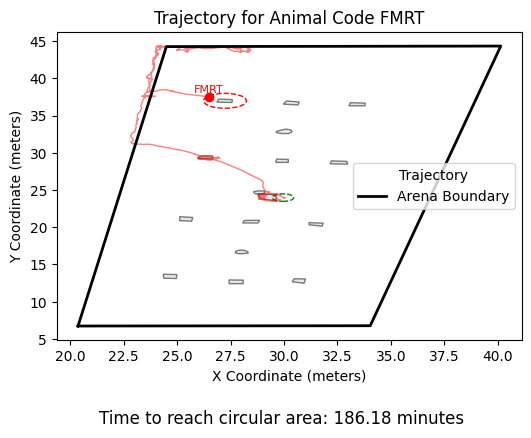

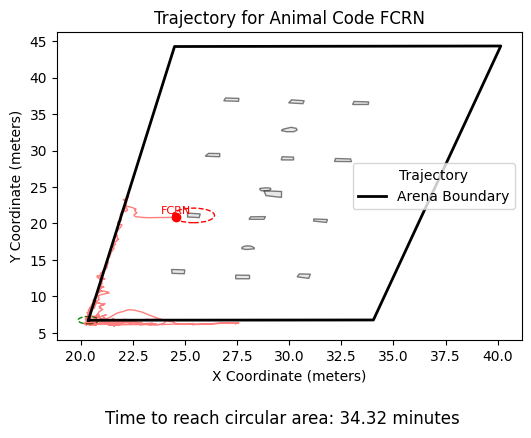

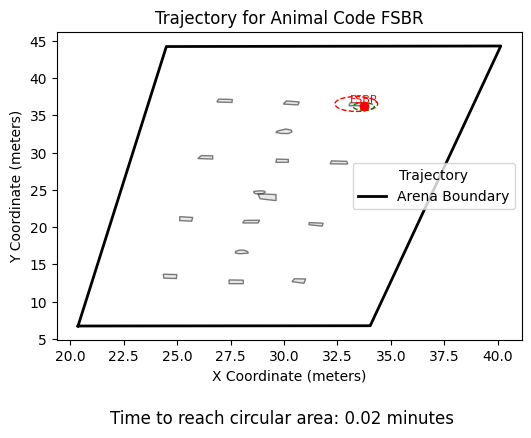

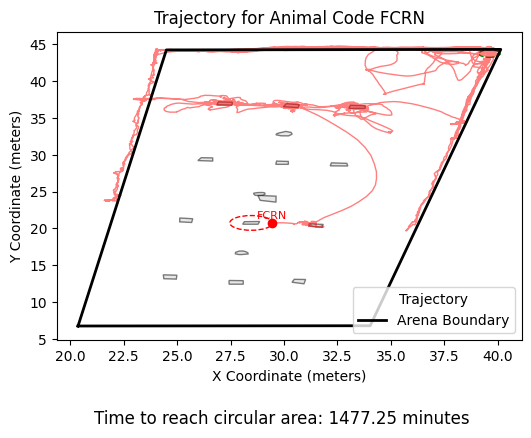

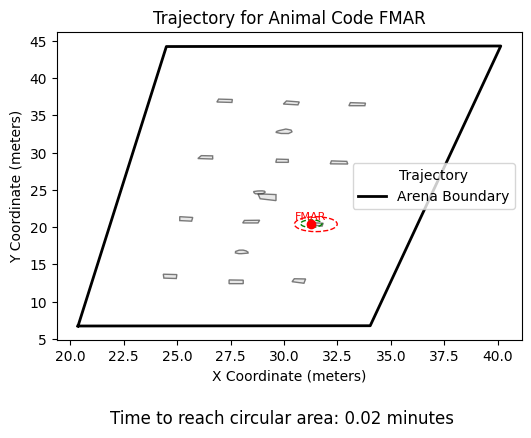

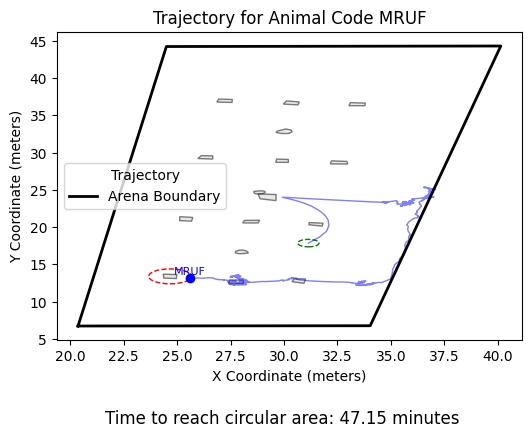

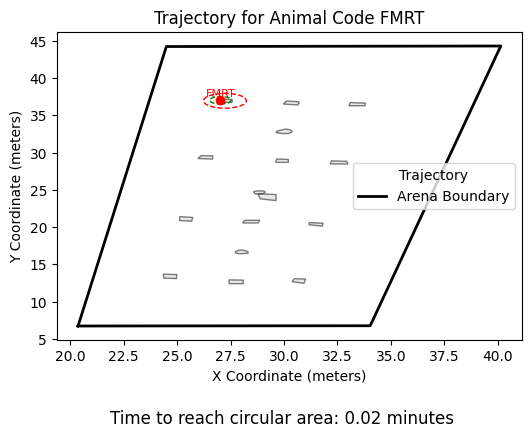

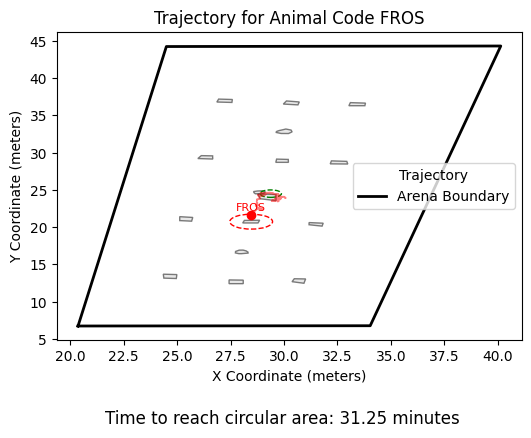

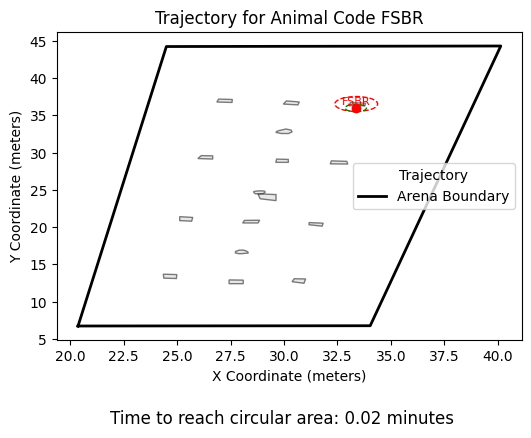

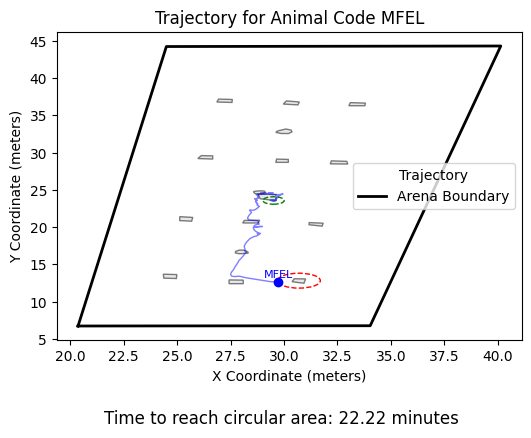

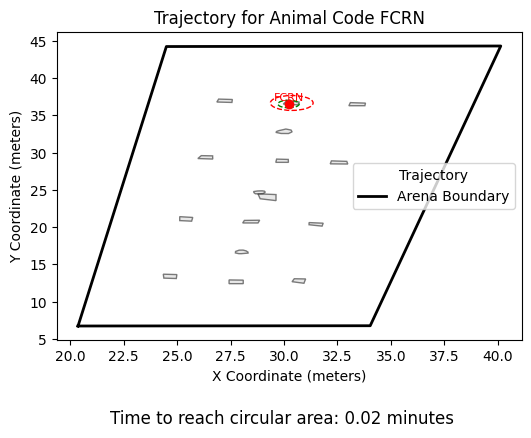

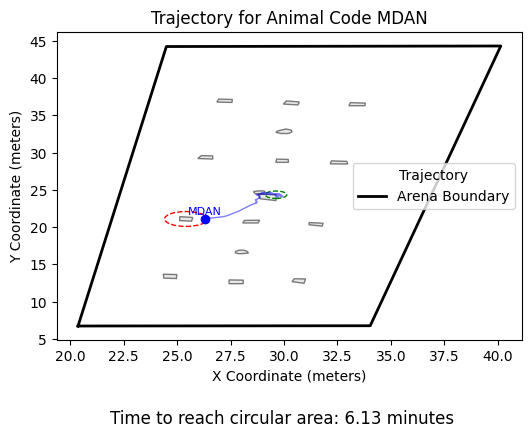

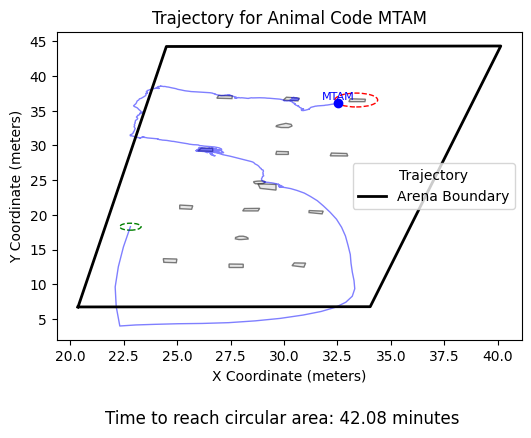

In [6]:
## get metadata from the homing pilots
homing_metadata = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\HomingPilotMetadata.csv')

# Convert the trial_date and trial_start to a single datetime column
homing_metadata['trial_start'] = pd.to_datetime(homing_metadata['trial_date'] + ' ' + homing_metadata['trial_time'].astype(str), format='%m/%d/%Y %H%M')

# homing_metadata

# get uwb layout details
arena_layout = pd.read_csv(r'Y:\Data\FieldProject\FieldMission5\uwb_arena_layout.csv')

# Convert from inches to meters
arena_layout[['x', 'y']] = arena_layout[['x', 'y']] * 0.0254  

# Separate arena and zones for drawing
arena_coords = arena_layout[arena_layout['type'] == 'arena']
zones = arena_layout[arena_layout['type'] != 'arena']
zone_names = zones['type'].unique()


from matplotlib.patches import Circle

# Loop through each row in the metadata to generate plots for each animal
for index, row in homing_metadata.iterrows():
    # Extract information for the current animal
    animal_code = row['focal_code']
    trial_start = row['trial_start']
    trap_location = row['trap_location']
    
    # Get the coordinates of the trap location from the layout
    trap_coords = zones[zones['type'] == trap_location][['x', 'y']].values
    # Calculate the center of the trap location
    trap_center = trap_coords.mean(axis=0)
    
    # Filter the dataframe for the specific animal
    filtered_df = df[(df['code'] == animal_code) & 
                     (df['field_time'] >= trial_start)]

    # Initialize variables to store when the animal reaches the trap location and the circular area
    trap_reached_time = None
    circular_area_reached_time = None
    
    # Store the first known position of the animal
    first_x = filtered_df['smoothed_x'].values[0]
    first_y = filtered_df['smoothed_y'].values[0]

    # Find the point where the animal crosses into the trap location or within the 1m circular area
    for i in range(1, len(filtered_df)):
        point_x = filtered_df['smoothed_x'].values[i]
        point_y = filtered_df['smoothed_y'].values[i]
        
        # Check if the current point is within the trap boundary
        if (trap_coords[0][0] <= point_x <= trap_coords[1][0]) and (trap_coords[0][1] <= point_y <= trap_coords[1][1]):
            if trap_reached_time is None:
                trap_reached_time = filtered_df['field_time'].values[i]
            filtered_df = filtered_df[:i+1]  # Truncate the dataframe up to this point
            break
        
        # Check if the current point is within 1 meter of the center of the trap location
        distance_to_center = ((point_x - trap_center[0])**2 + (point_y - trap_center[1])**2) ** 0.5
        if distance_to_center <= 1.0:
            if circular_area_reached_time is None:
                circular_area_reached_time = filtered_df['field_time'].values[i]
            filtered_df = filtered_df[:i+1]  # Truncate the dataframe up to this point
            break

    # Plotting
    plt.figure(figsize=(6, 4))
    
    # Plot each animal's trajectory with color based on sex
    for code in filtered_df['code'].unique():
        animal_data = filtered_df[filtered_df['code'] == code]
        color = 'blue' if animal_data['sex'].values[0] == 'M' else 'red'
        
        # Draw the line connecting the points
        plt.plot(animal_data['smoothed_x'], animal_data['smoothed_y'], color=color, alpha=0.5, linewidth=1)
        
        # Plot the current position (last point in the data)
        plt.plot(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1], 'o', color=color)
        
        # Add the code label above the dot
        plt.text(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1] + 0.5, code, 
                 fontsize=8, ha='center', color=color)
    
    plt.title(f"Trajectory for Animal Code {animal_code}")
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    
    # Draw arena boundary
    plt.plot(arena_coords['x'], arena_coords['y'], color='black', linewidth=2, label='Arena Boundary')

    # Draw zones
    for zone_name in zone_names:
        zone_coords = zones[zones['type'] == zone_name]
        polygon = Polygon(zone_coords[['x', 'y']].values, closed=True, edgecolor='black', facecolor='lightgray', alpha=0.5)
        plt.gca().add_patch(polygon)

    # Draw a red dotted circle around the center of the trap location
    trap_circle = Circle(trap_center, 1.0, color='red', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_patch(trap_circle)

    # Draw a green dotted circle around the animal's first known position
    start_circle = Circle((first_x, first_y), 0.5, color='green', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_patch(start_circle)

    # Add the time taken to reach the trap location and the circular area
    if trap_reached_time:
        time_to_trap = (trap_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.1, f"Time to reach trap location: {time_to_trap:.2f} minutes", ha="center", fontsize=12)
    elif circular_area_reached_time:
        time_to_circle = (circular_area_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.1, f"Time to reach trap location: {time_to_circle:.2f} minutes", ha="center", fontsize=12)
    else:
        plt.figtext(0.5, -0.1, "Animal does not return to trap location or visit the 1m circle", ha="center", fontsize=12)

    plt.legend(title="Trajectory")
    
    # Show the plot
    plt.show()


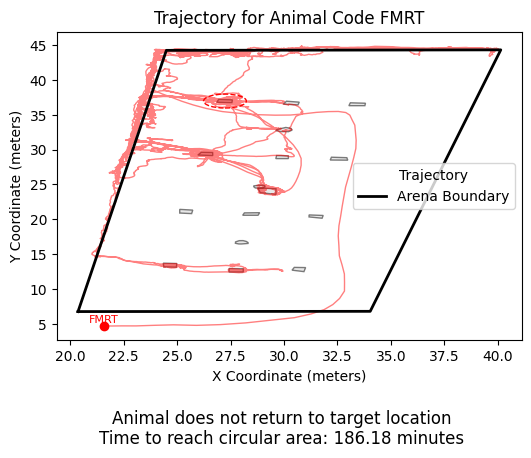

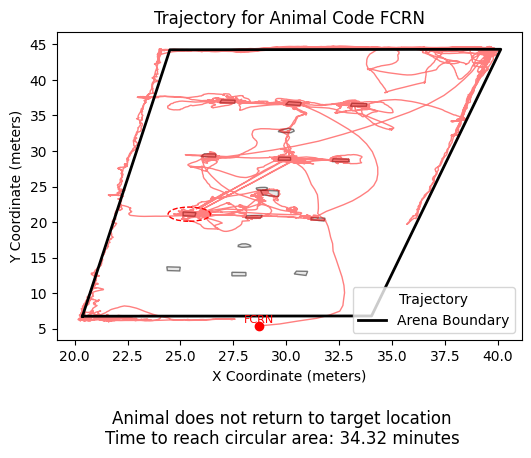

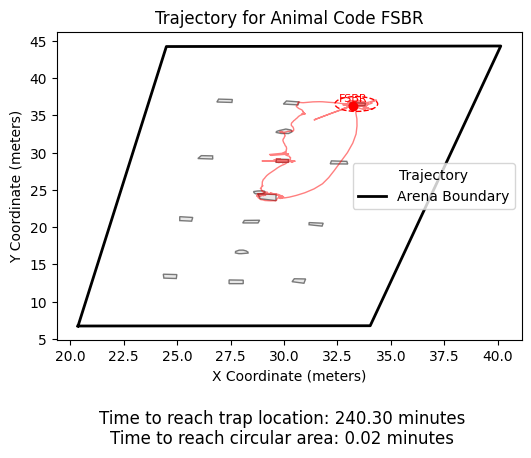

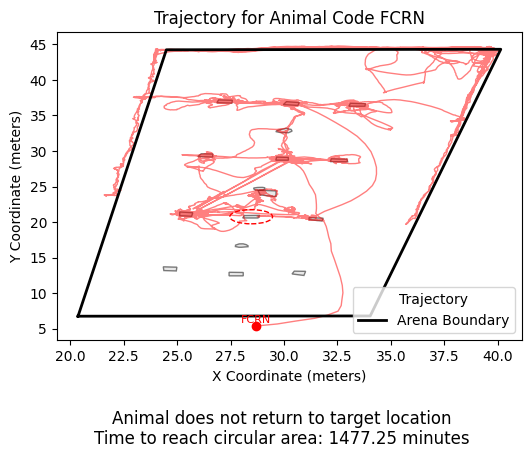

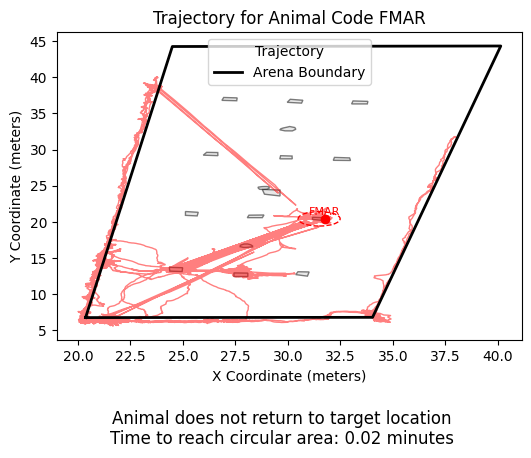

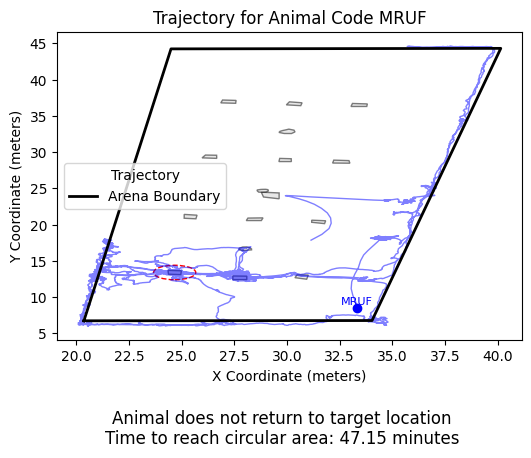

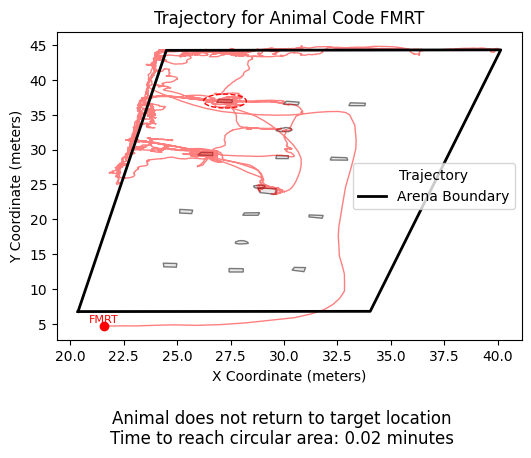

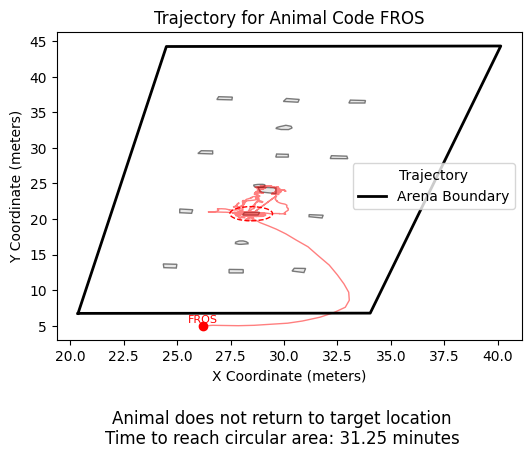

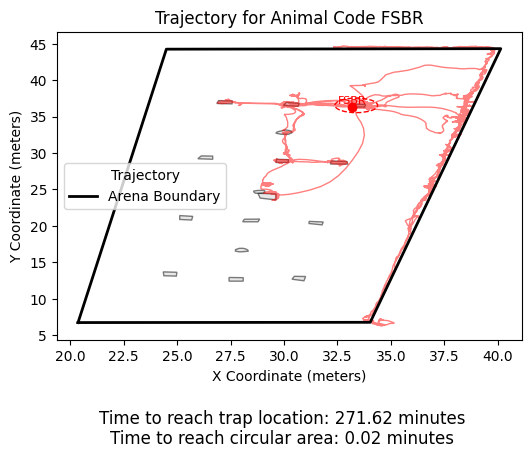

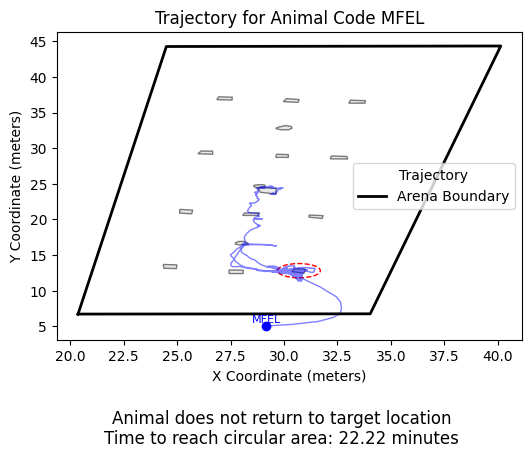

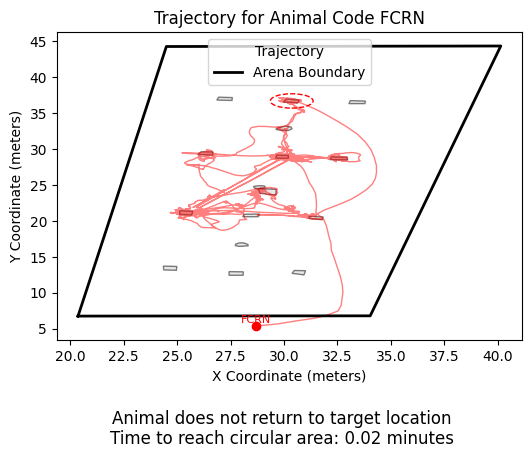

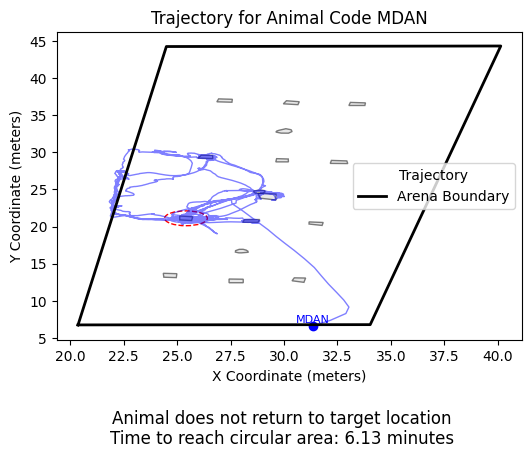

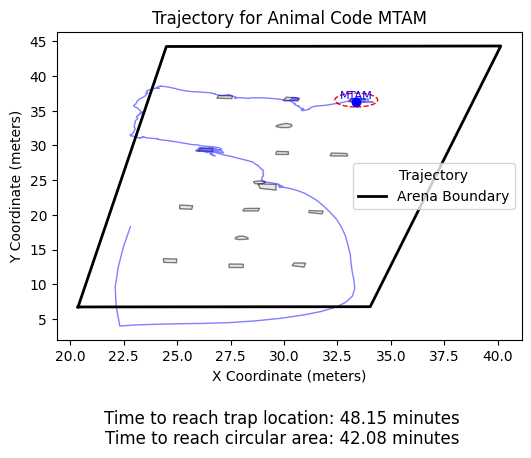

In [5]:
from matplotlib.patches import Circle

# Loop through each row in the metadata to generate plots for each animal
for index, row in homing_metadata.iterrows():
    # Extract information for the current animal
    animal_code = row['focal_code']
    trial_start = row['trial_start']
    trap_location = row['trap_location']
    
    # Get the coordinates of the trap location from the layout
    trap_coords = zones[zones['type'] == trap_location][['x', 'y']].values
    # Calculate the center of the trap location
    trap_center = trap_coords.mean(axis=0)
    
    # Filter the dataframe for the specific animal
    filtered_df = df[(df['code'] == animal_code) & 
                     (df['field_time'] >= trial_start)]

    # Initialize variables to store when the animal reaches the trap location and the circular area
    trap_reached_time = None
    circular_area_reached_time = None
    
    # Find the point where the animal crosses into the trap location or within the 1m circular area
    for i in range(1, len(filtered_df)):
        point_x = filtered_df['smoothed_x'].values[i]
        point_y = filtered_df['smoothed_y'].values[i]
        
        # Check if the current point is within the trap boundary
        if (trap_coords[0][0] <= point_x <= trap_coords[1][0]) and (trap_coords[0][1] <= point_y <= trap_coords[1][1]):
            if trap_reached_time is None:
                trap_reached_time = filtered_df['field_time'].values[i]
        
        # Check if the current point is within 1 meter of the center of the trap location
        distance_to_center = ((point_x - trap_center[0])**2 + (point_y - trap_center[1])**2) ** 0.5
        if distance_to_center <= 1.0 and circular_area_reached_time is None:
            circular_area_reached_time = filtered_df['field_time'].values[i]
        
        # If both metrics are found, stop the loop
        if trap_reached_time or circular_area_reached_time:
            filtered_df = filtered_df[:i+1]  # Truncate the dataframe up to this point
            break
    
    # Plotting
    plt.figure(figsize=(6, 4))
    
    # Plot each animal's trajectory with color based on sex
    for code in filtered_df['code'].unique():
        animal_data = filtered_df[filtered_df['code'] == code]
        color = 'blue' if animal_data['sex'].values[0] == 'M' else 'red'
        
        # Draw the line connecting the points
        plt.plot(animal_data['smoothed_x'], animal_data['smoothed_y'], color=color, alpha=0.5, linewidth=1)
        
        # Plot the current position (last point in the data)
        plt.plot(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1], 'o', color=color)
        
        # Add the code label above the dot
        plt.text(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1] + 0.5, code, 
                 fontsize=8, ha='center', color=color)
    
    plt.title(f"Trajectory for Animal Code {animal_code}")
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    
    # Draw arena boundary
    plt.plot(arena_coords['x'], arena_coords['y'], color='black', linewidth=2, label='Arena Boundary')

    # Draw zones
    for zone_name in zone_names:
        zone_coords = zones[zones['type'] == zone_name]
        polygon = Polygon(zone_coords[['x', 'y']].values, closed=True, edgecolor='black', facecolor='lightgray', alpha=0.5)
        plt.gca().add_patch(polygon)

    # Draw a red circle around the center of the trap location
    circle = Circle(trap_center, 1.0, color='red', fill=False, linestyle='--', linewidth=1)
    plt.gca().add_patch(circle)

    # Add the time taken to reach the trap location and the circular area
    if trap_reached_time:
        time_to_trap = (trap_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.1, f"Time to reach trap location: {time_to_trap:.2f} minutes", ha="center", fontsize=12)
    else:
        plt.figtext(0.5, -0.1, "Animal does not return to target location", ha="center", fontsize=12)

    if circular_area_reached_time:
        time_to_circle = (circular_area_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.15, f"Time to reach circular area: {time_to_circle:.2f} minutes", ha="center", fontsize=12)
    else:
        plt.figtext(0.5, -0.15, "Animal does not visit the 1m circular area", ha="center", fontsize=12)

    plt.legend(title="Trajectory")
    
    # Show the plot
    plt.show()


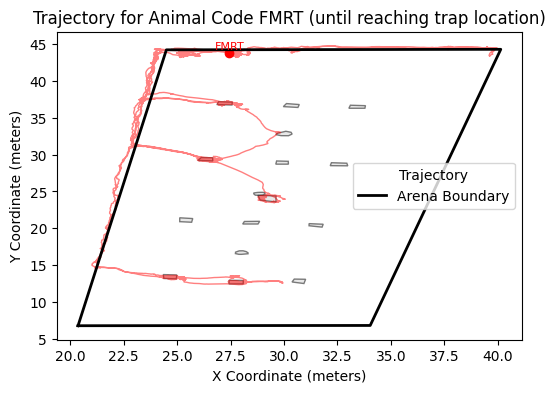

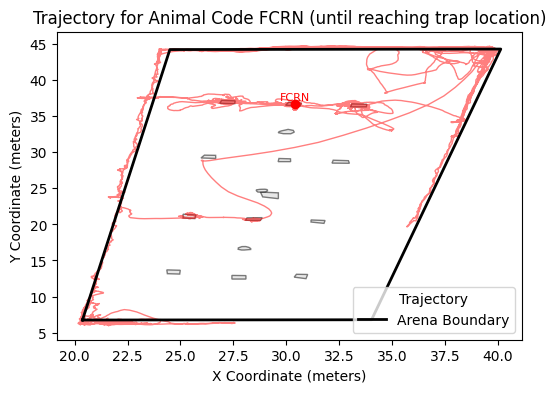

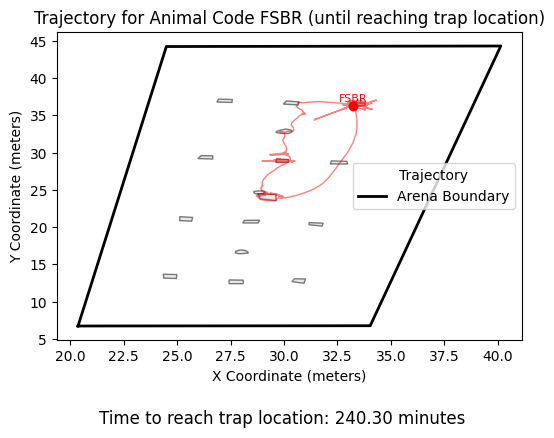

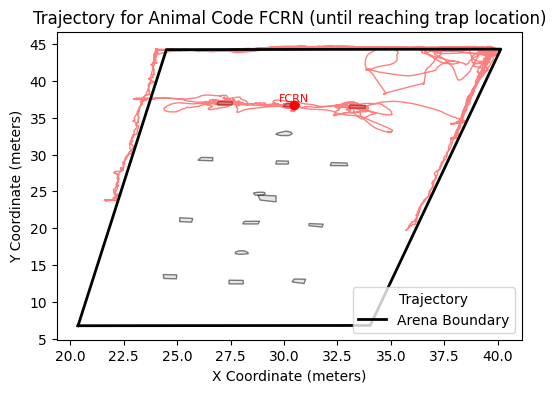

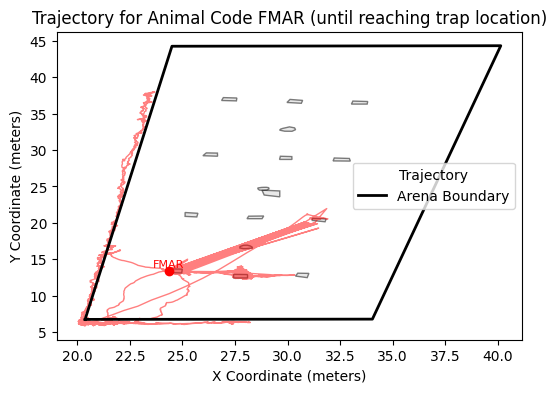

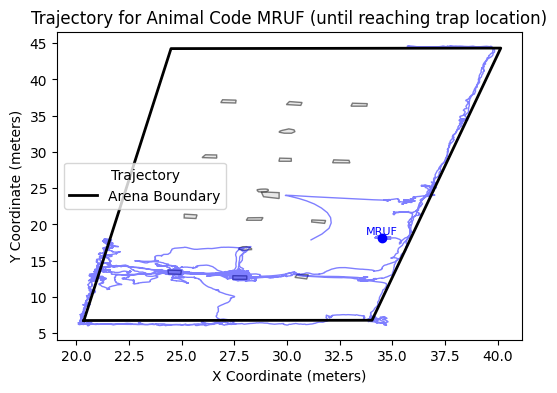

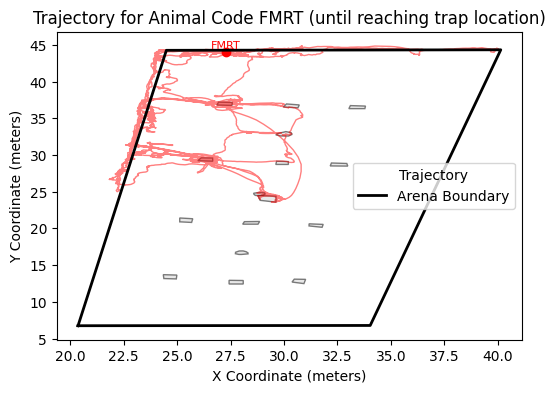

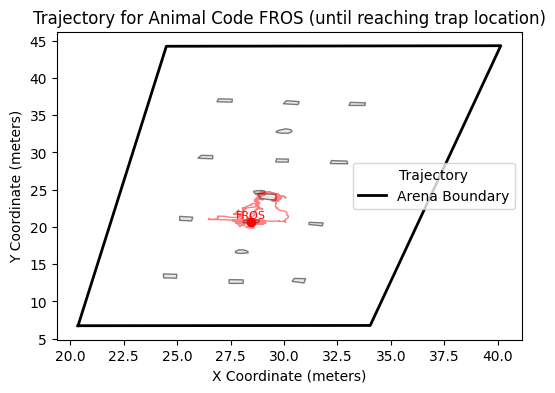

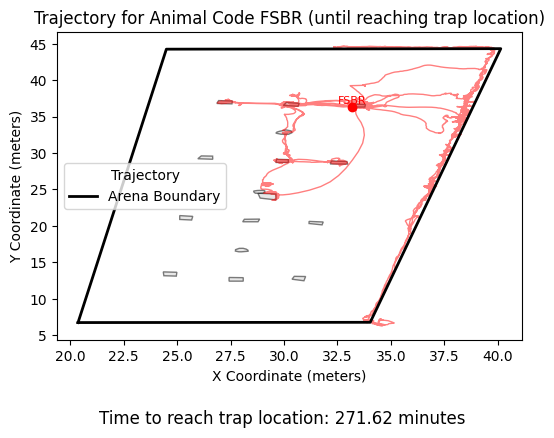

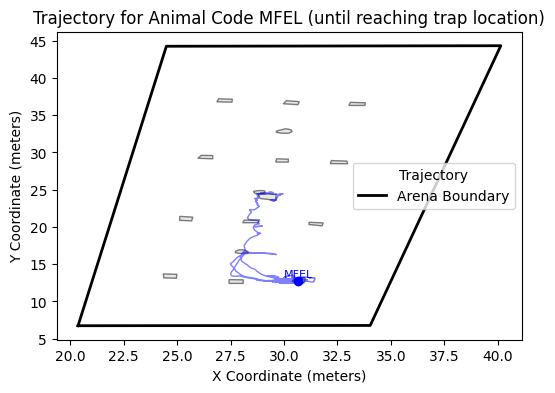

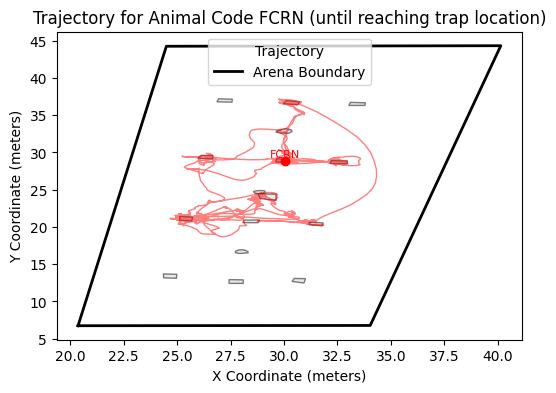

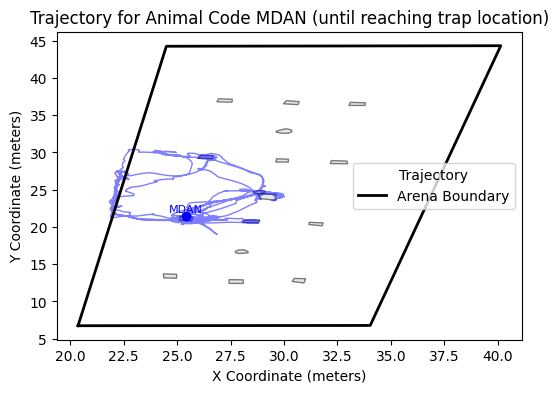

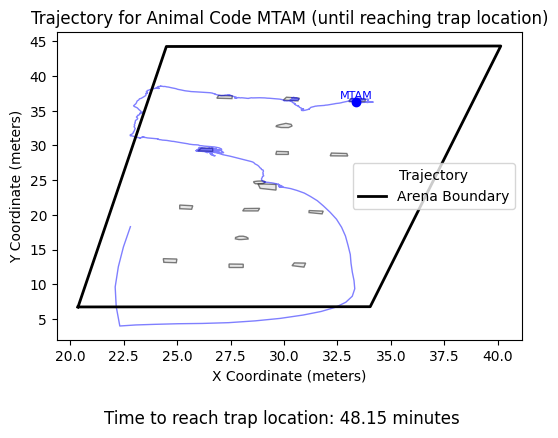

In [4]:

# Loop through each row in the metadata to generate plots for each animal
for index, row in homing_metadata.iterrows():
    # Extract information for the current animal
    animal_code = row['focal_code']
    trial_start = row['trial_start']
    trap_location = row['trap_location']
    
    # Get the coordinates of the trap location from the layout
    trap_coords = zones[zones['type'] == trap_location][['x', 'y']].values
    
    # Filter the dataframe for the specific animal within 12 hours after the trial start
    filtered_df = df[(df['code'] == animal_code) & 
                     (df['field_time'] >= trial_start) & 
                     (df['field_time'] <= trial_start + pd.Timedelta(hours=12))]
    
    # Initialize a variable to store when the animal reaches the trap location
    trap_reached_time = None
    
    # Find the point where the animal crosses into the trap location
    for i in range(1, len(filtered_df)):
        point_x = filtered_df['smoothed_x'].values[i]
        point_y = filtered_df['smoothed_y'].values[i]
        
        # Check if the current point is within the trap boundary
        if (trap_coords[0][0] <= point_x <= trap_coords[1][0]) and (trap_coords[0][1] <= point_y <= trap_coords[1][1]):
            trap_reached_time = filtered_df['field_time'].values[i]
            filtered_df = filtered_df[:i+1]  # Truncate the dataframe up to this point
            break
    
    # Plotting
    plt.figure(figsize=(6, 4))
    
    # Plot each animal's trajectory with color based on sex
    for code in filtered_df['code'].unique():
        animal_data = filtered_df[filtered_df['code'] == code]
        color = 'blue' if animal_data['sex'].values[0] == 'M' else 'red'
        
        # Draw the line connecting the points
        plt.plot(animal_data['smoothed_x'], animal_data['smoothed_y'], color=color, alpha=0.5, linewidth=1)
        
        # Plot the current position (last point in the data)
        plt.plot(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1], 'o', color=color)
        
        # Add the code label above the dot
        plt.text(animal_data['smoothed_x'].values[-1], animal_data['smoothed_y'].values[-1] + 0.5, code, 
                 fontsize=8, ha='center', color=color)
    
    plt.title(f"Trajectory for Animal Code {animal_code} (until reaching trap location)")
    plt.xlabel("X Coordinate (meters)")
    plt.ylabel("Y Coordinate (meters)")
    
    # Draw arena boundary
    plt.plot(arena_coords['x'], arena_coords['y'], color='black', linewidth=2, label='Arena Boundary')

    # Draw zones
    for zone_name in zone_names:
        zone_coords = zones[zones['type'] == zone_name]
        polygon = Polygon(zone_coords[['x', 'y']].values, closed=True, edgecolor='black', facecolor='lightgray', alpha=0.5)
        plt.gca().add_patch(polygon)
    
    # Add the time taken to reach the trap location
    if trap_reached_time:
        time_to_trap = (trap_reached_time - trial_start).total_seconds() / 60.0  # Convert to minutes
        plt.figtext(0.5, -0.1, f"Time to reach trap location: {time_to_trap:.2f} minutes", ha="center", fontsize=12)

    plt.legend(title="Trajectory")
    
    # Show the plot
    plt.show()